- `seaborn.objects`는 데이터 변환 및 plot 생성이 가능한 클래스를 모아둔 것으로, 보다 일관되고 유연한 API를 제공한다.
- 이는 matlotlib으로 plot을 구성하지 않으나 현재 실험적이고 불완전하다. 그러나, 사용하기엔 충분히 안정적이다 (?)

# Specifying a plot and mapping data

In [1]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# objects interface 로드
# seaborn.objects 네임스페이스 : 모든 관련 클래스에 대한 액세스 제공
import seaborn.objects as so
import seaborn.objects as so
import seaborn as sns

# 필요한 데이터 로드
penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")

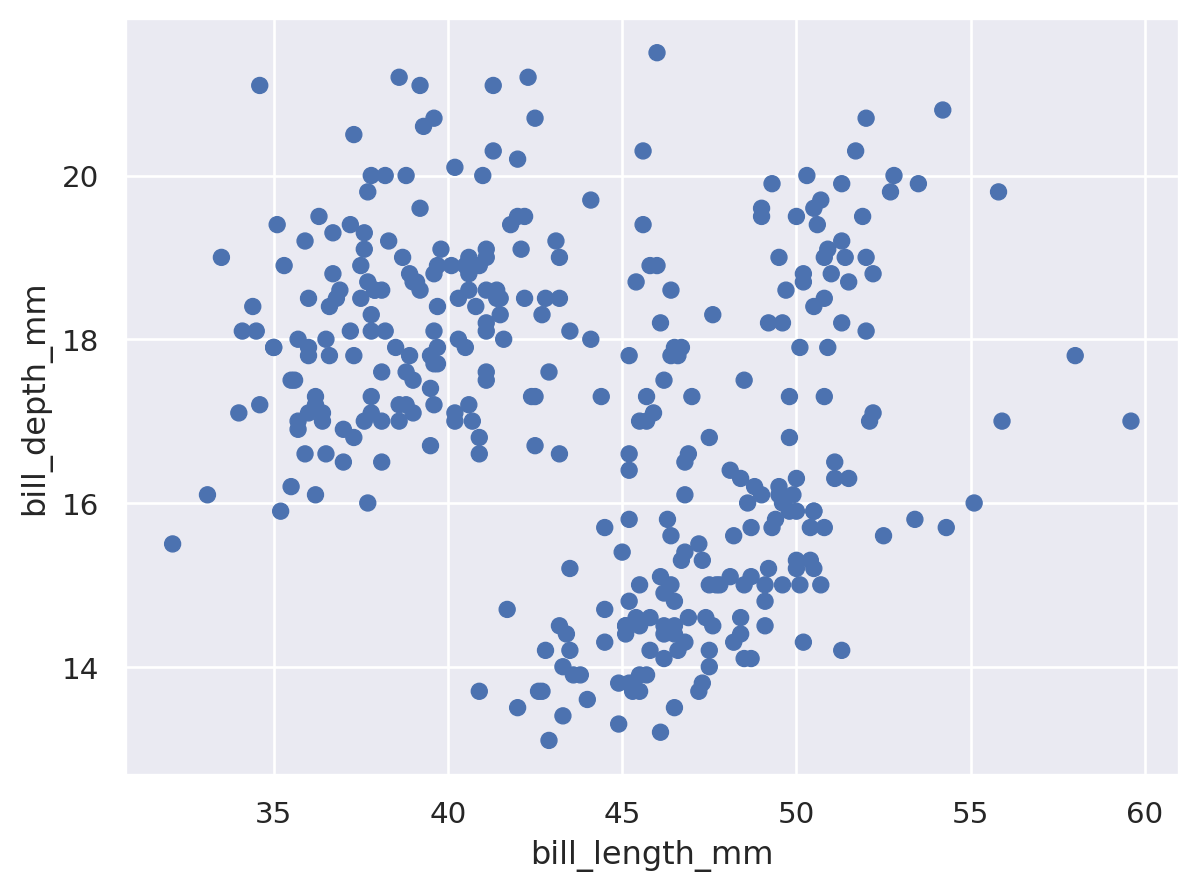

In [3]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

- `seaborn.scatterplot()`을 사용했을 때와 비슷한 생김새입니다.
- penguins 데이터프레임의 열 중 두 개의 열을 x와 y좌표로 사용하였습니다.
- 차이점은 seaborn은 차트를 먼저 만들고 데이터를 할당하지만, `seaborn.objects`는 데이터를 먼저 할당한 후 차트를 만듭니다다.

## Setting properties
- `Dot` 클래스는 `Mark` 중 하나의 예시인데, 각 마크는 모양을 변경할 수 있는 여러 속성이 있습니다.
- `Mark`는 데이터 값을 그래픽으로 나타내는 객체입니다.

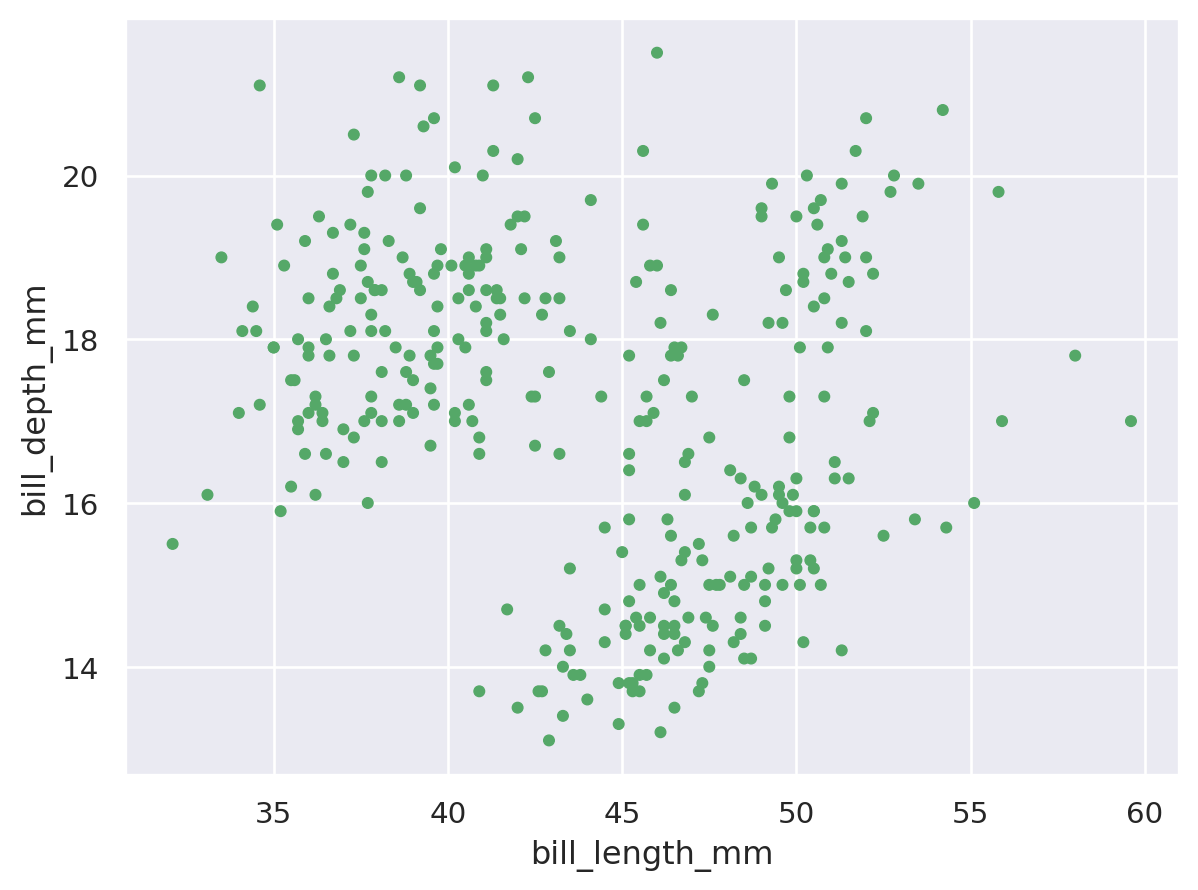

In [4]:
# add'값에 'color='와 'pointsize='를 사용하여 꾸며보았다.
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

## Mapping properties
- `seaborn.objects`는 seaborn과 마찬가지로 데이터 값을 다양한 그래픽 속성에 매핑할 수 있습니다.

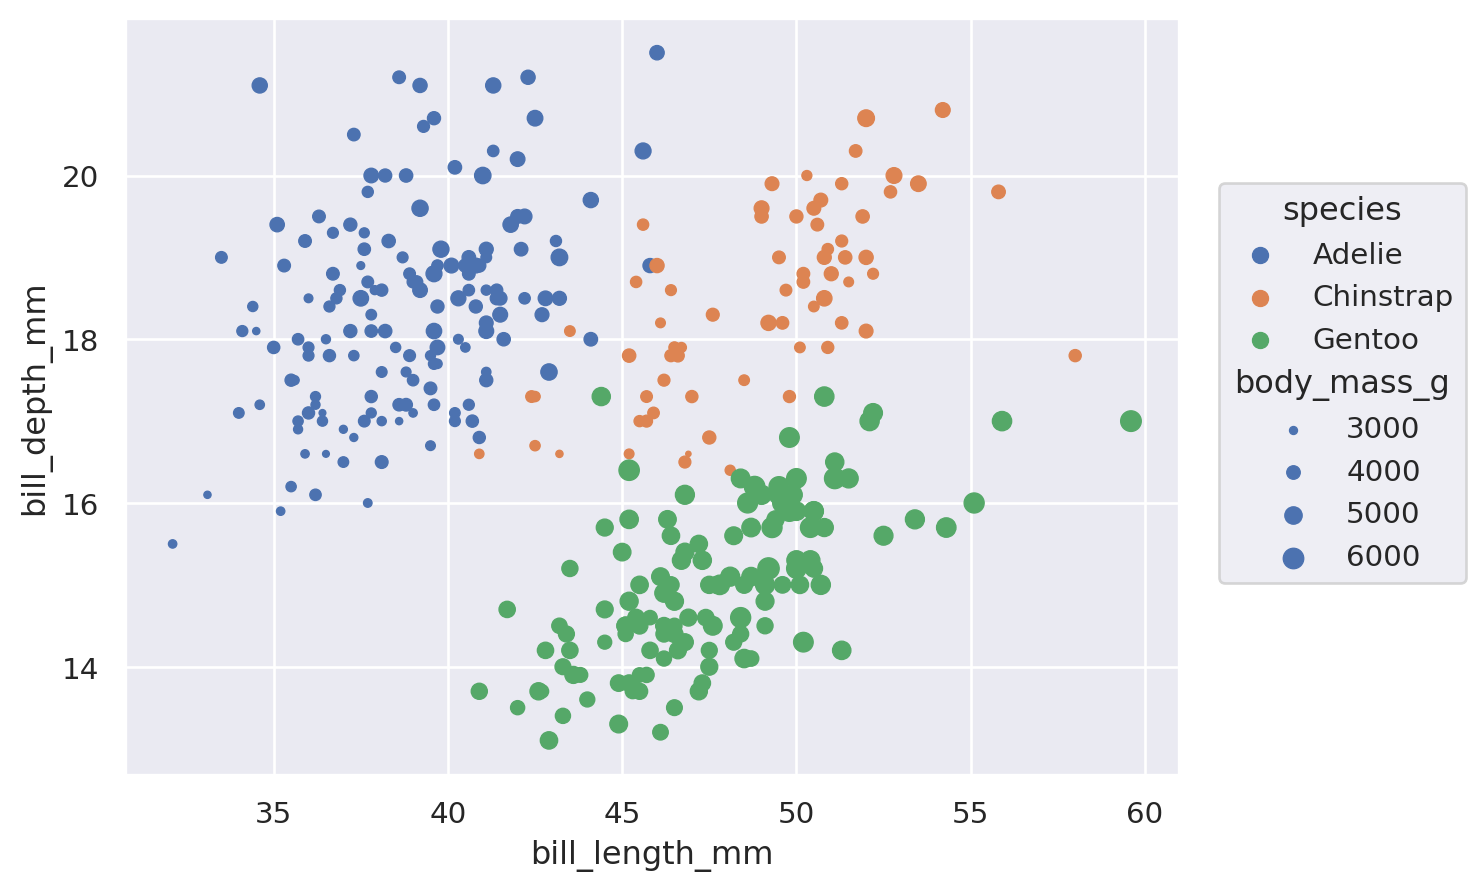

In [5]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

- 이 기능은 새로운 기능은 아니지만 속성을 직접 설정하는 매개변수와 동일한 이름을 사용하여 속성을 매핑합니다.
- `hue`대신에 `color`사용합니다.
- 초기화할 때 값을 전달하면 직접 설정되지만, 변수를 할당하면 해당 plot이 데이터를 매핑합니다.

- 개체 인터페이스를 사용한 더 광범위한 마크속성

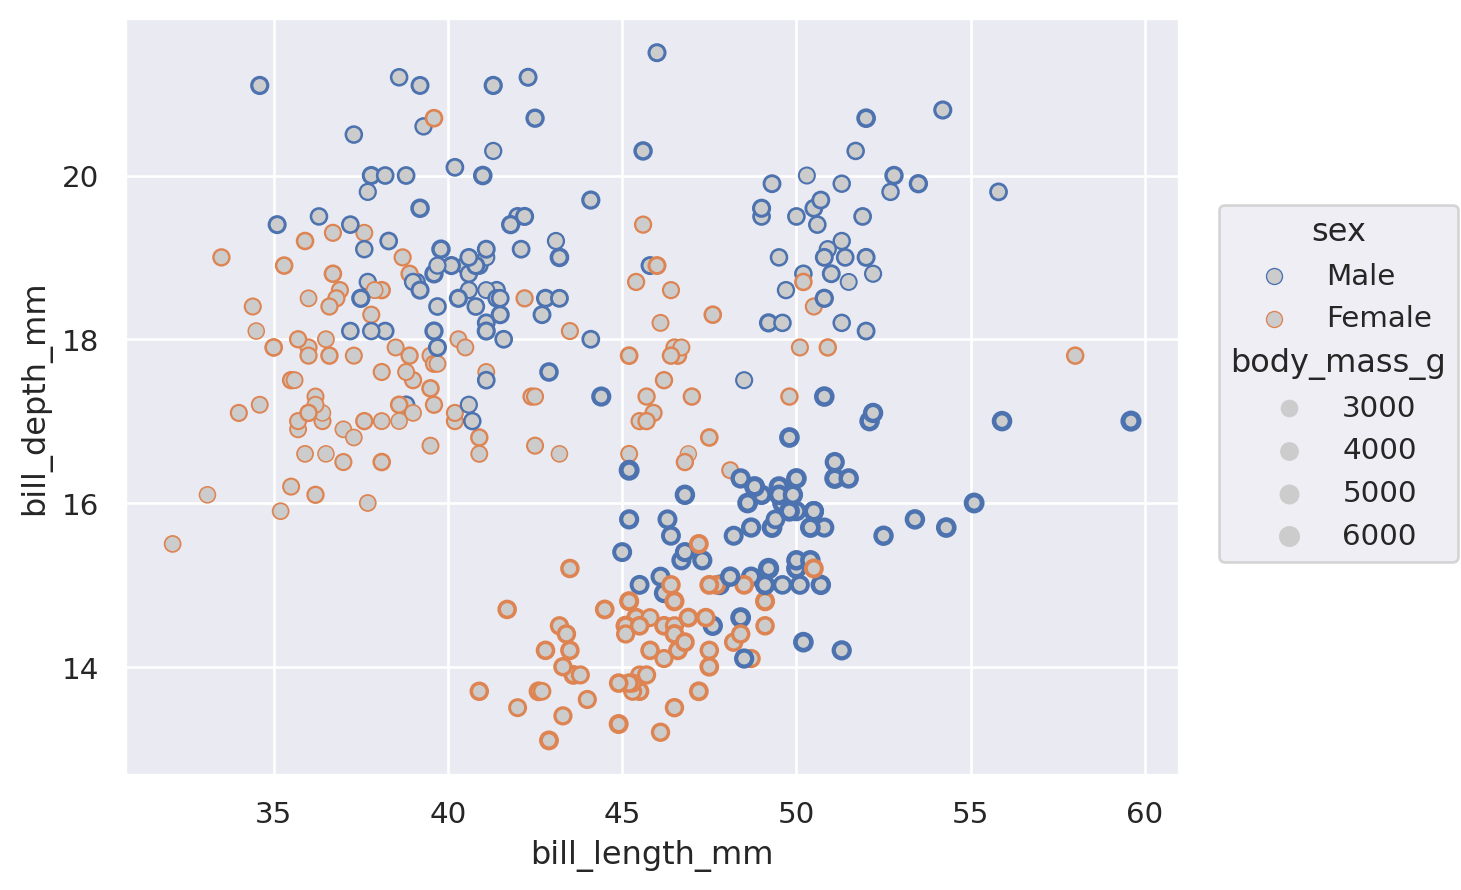

In [6]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor="sex", edgewidth="body_mass_g",
    )
    .add(so.Dot(color=".8"))
)

## Defining groups
- `Dot`은 데이터 포이트를 독립적으로 나타내므로, 변수 속성에 할당하면 각 점의 모형이 변경되는 효과만 있습니다.
- `line`을 사용하여 그룹짓거나 관찰가능한 데이터와 연결하면 `line`의 개수가 적용됩니다.

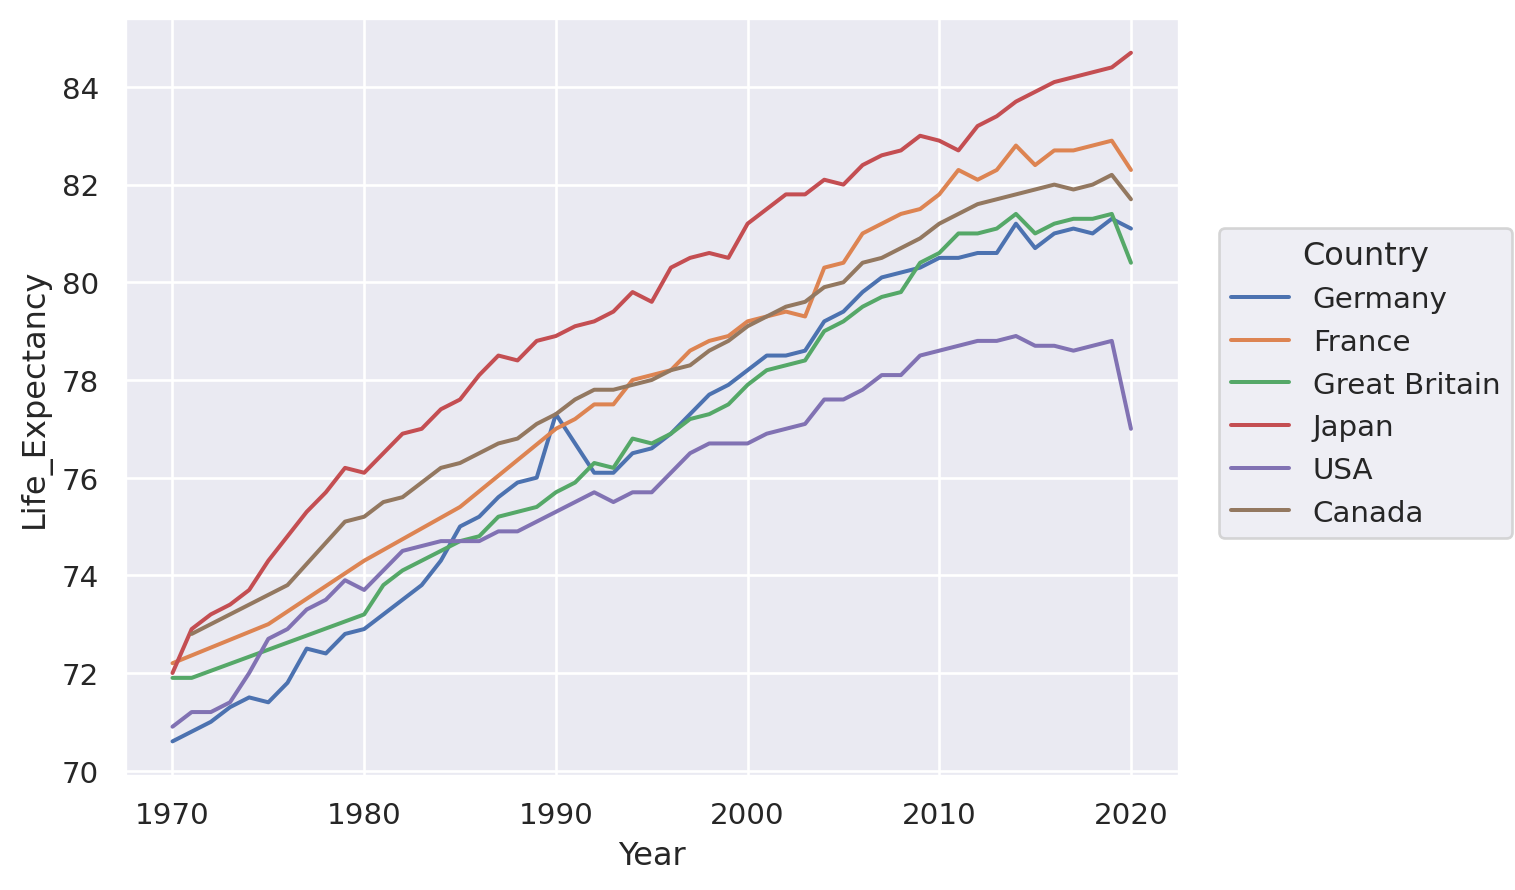

In [7]:
healthexp = sns.load_dataset("healthexp")
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", color="Country")
    .add(so.Line())
)

- `color`가 아닌 `group`을 사용하면 시각적 속성이 바뀌지 않은 채로 그룹화할 수 있습니다.

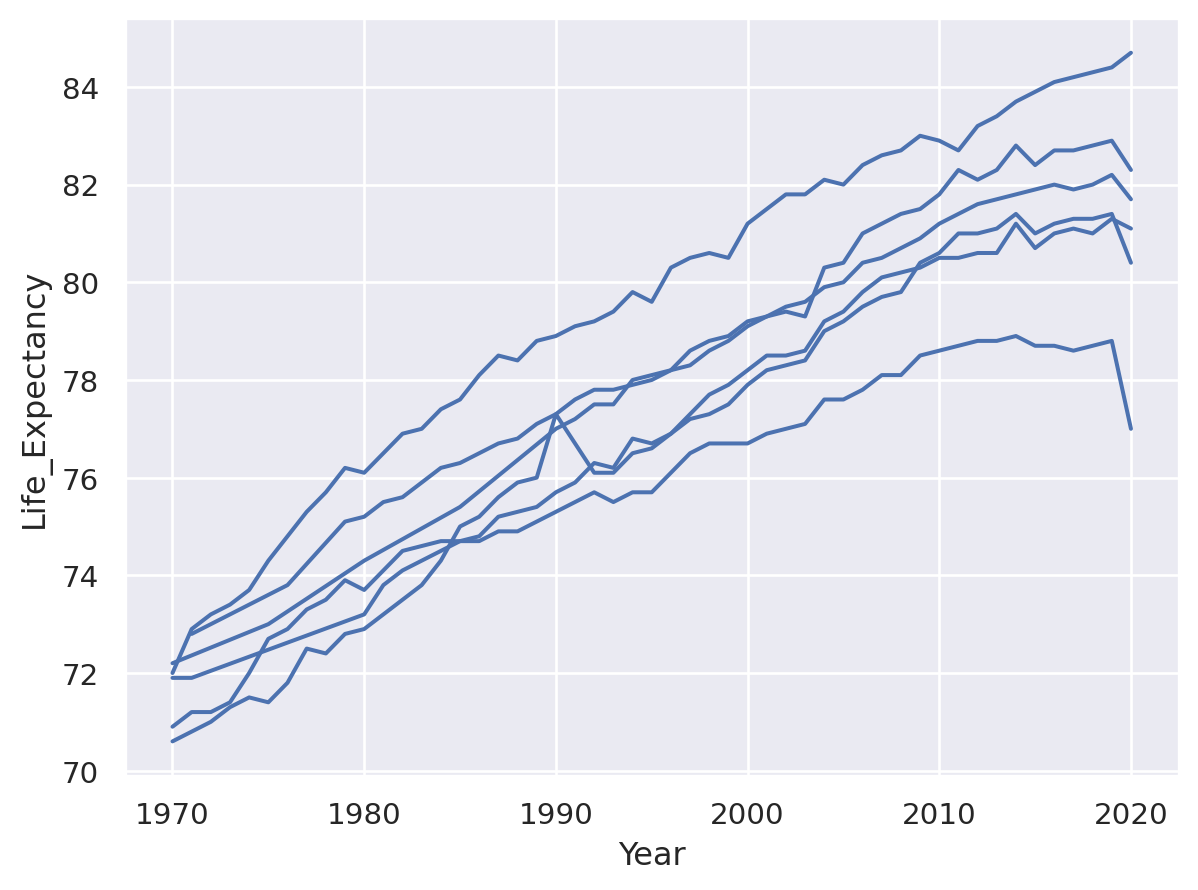

In [8]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", group="Country")
    .add(so.Line())
)

# Transforming data before plotting
## Statistical transformation
* 객체 인터페이스는 seaborn 함수와 마찬가지로 통계적 변환을 지원합니다.

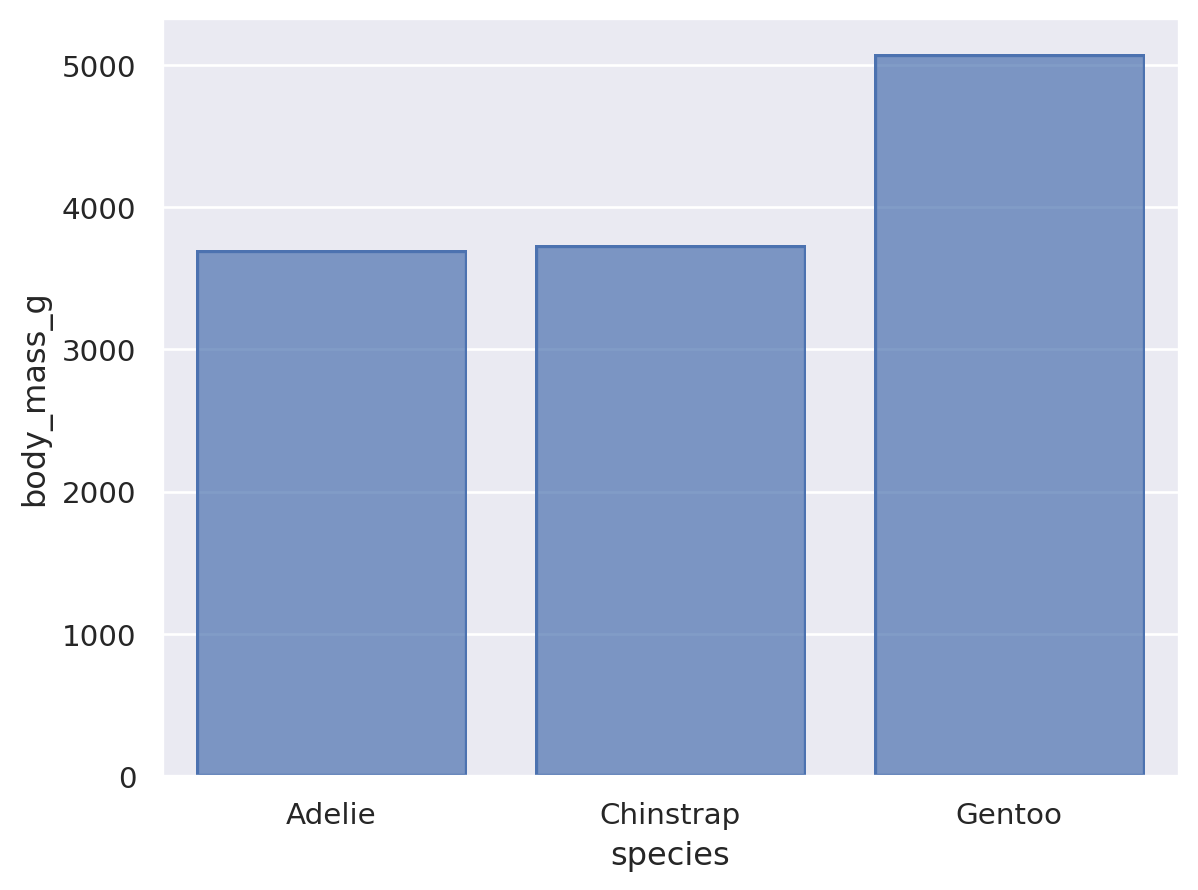

In [9]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Bar(), so.Agg())
)

- `sns.barplot()`에서는 통계적 변환이 가능하지만 `sns.scatterplot()`에서는 불가능합니다.
- 따라서 Dot을 추가해 표현할 수 있습니다.

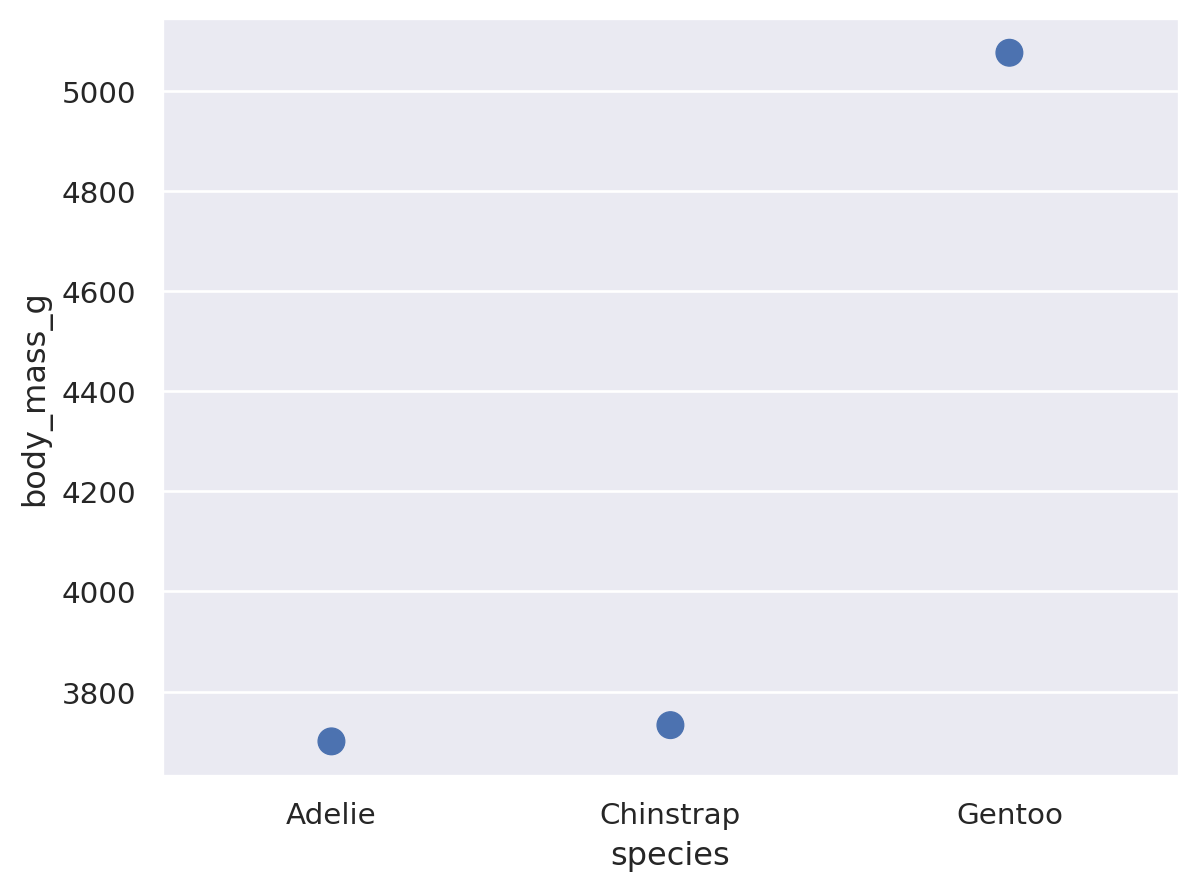

In [10]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Dot(pointsize=10), so.Agg())
)

- 속성을 매핑하여 그룹을 형성할 때 `Stat`변환은 각 그룹에 개별적으로 적용됩니다.

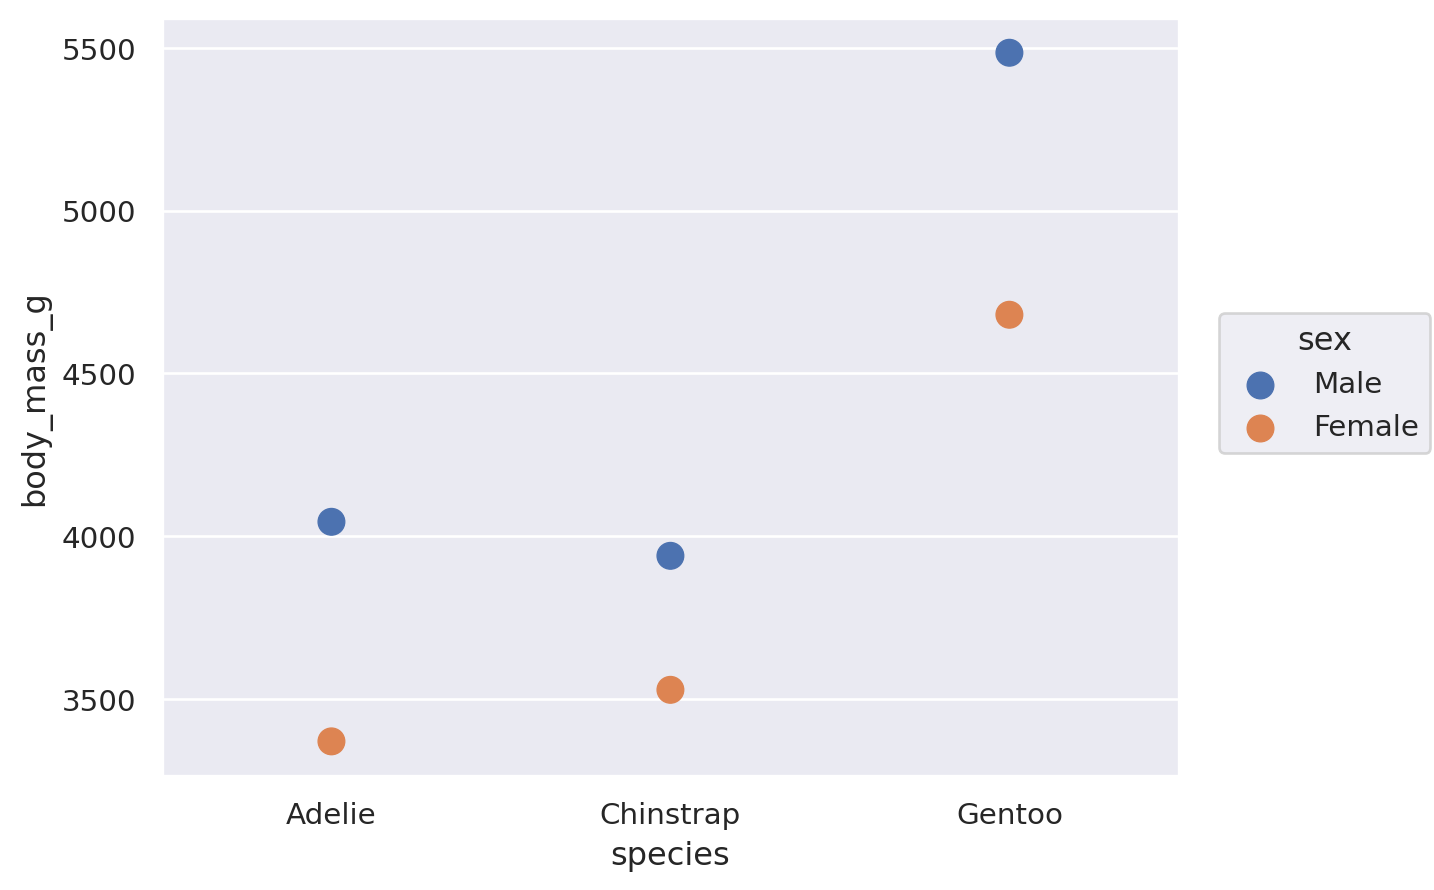

In [11]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(pointsize=10), so.Agg())
)

## Resolving overplotting
- 일부 seaborn의 기능에는 `sns.barplot()`에서 `hue`를 사용할 때와 같이 오버플로팅을 자동으로 해결하는 매커니즘이 있습니다.
- 여러 그룹을 나타내는 막대는 기본적으로 겹쳐집니다.

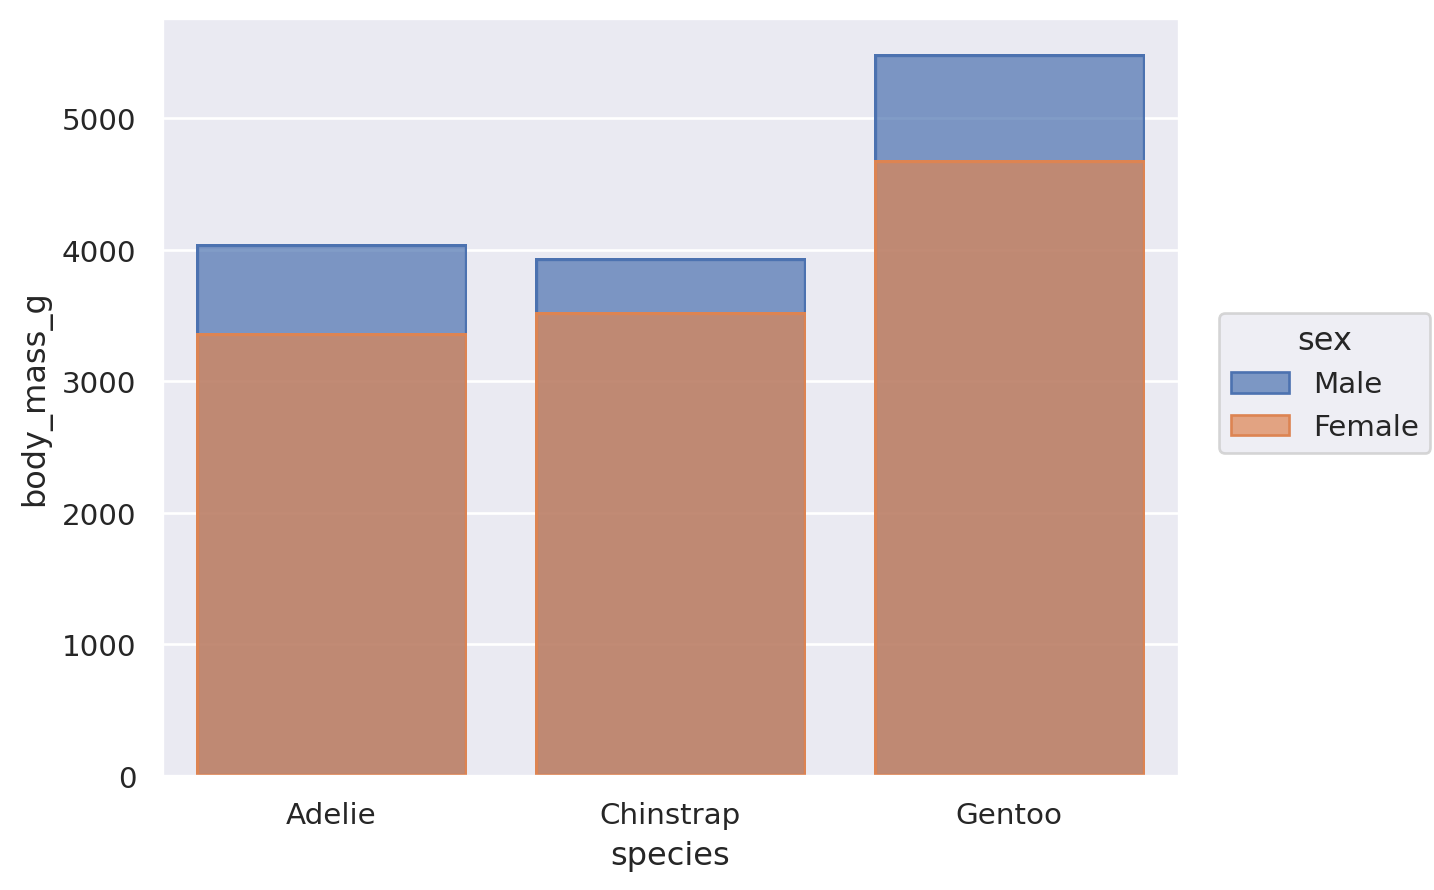

In [12]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

- `Dodge`를 사용하여 bar의 형태를 바꿀 수도 있습니다.

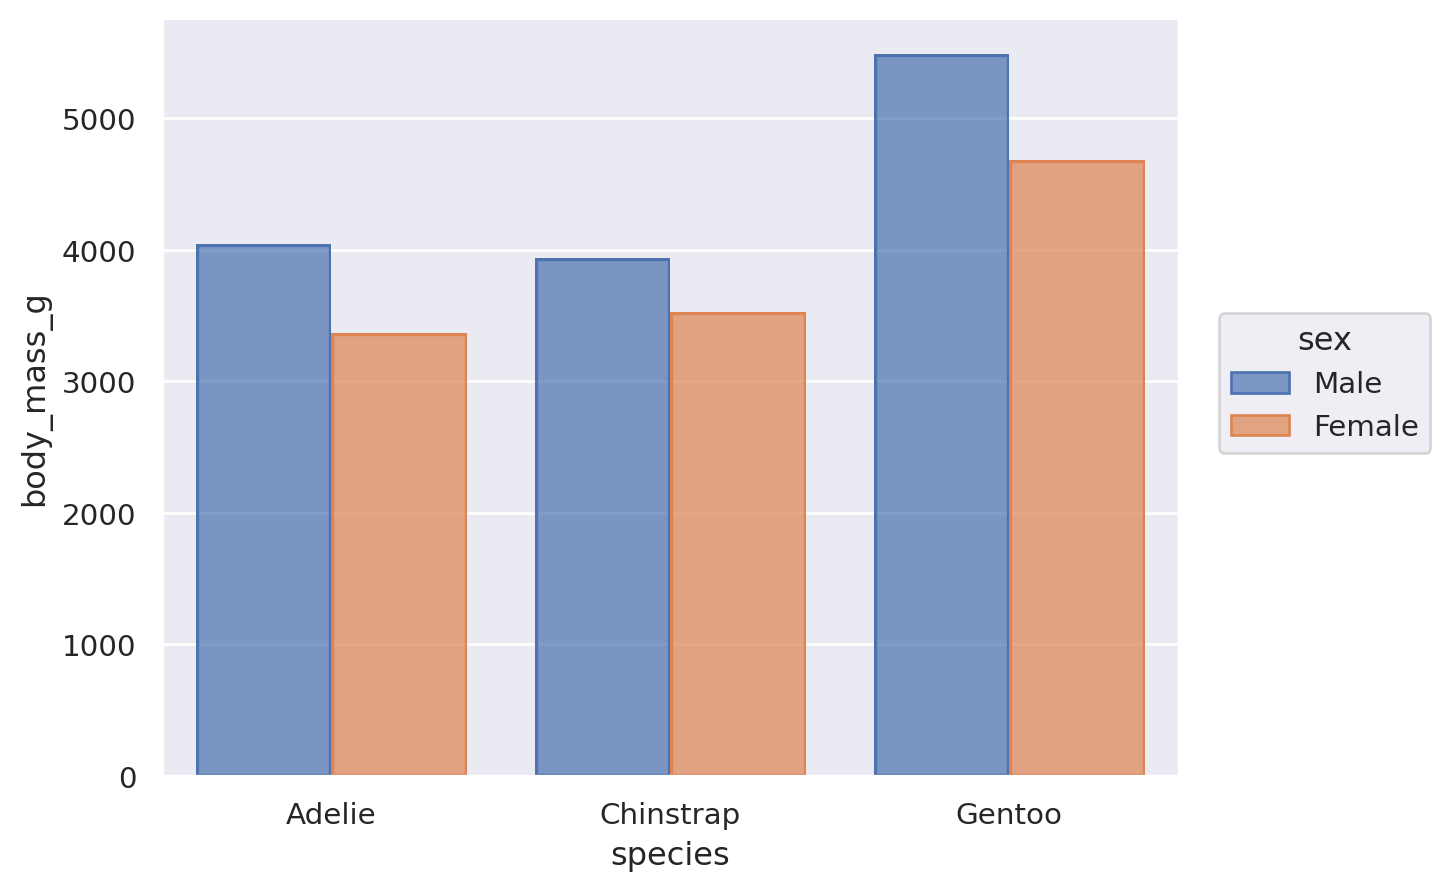

In [13]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

`Dodge` 클래스는 `Stat`와 유사하지만 `x` 및 `y` 좌표만 조정하는 `Move` 변환의 예입니다. `Move` 클래스는 모든 마크와 함께 적용할 수 있으며 먼저 `Stat`를 사용할 필요가 없습니다.

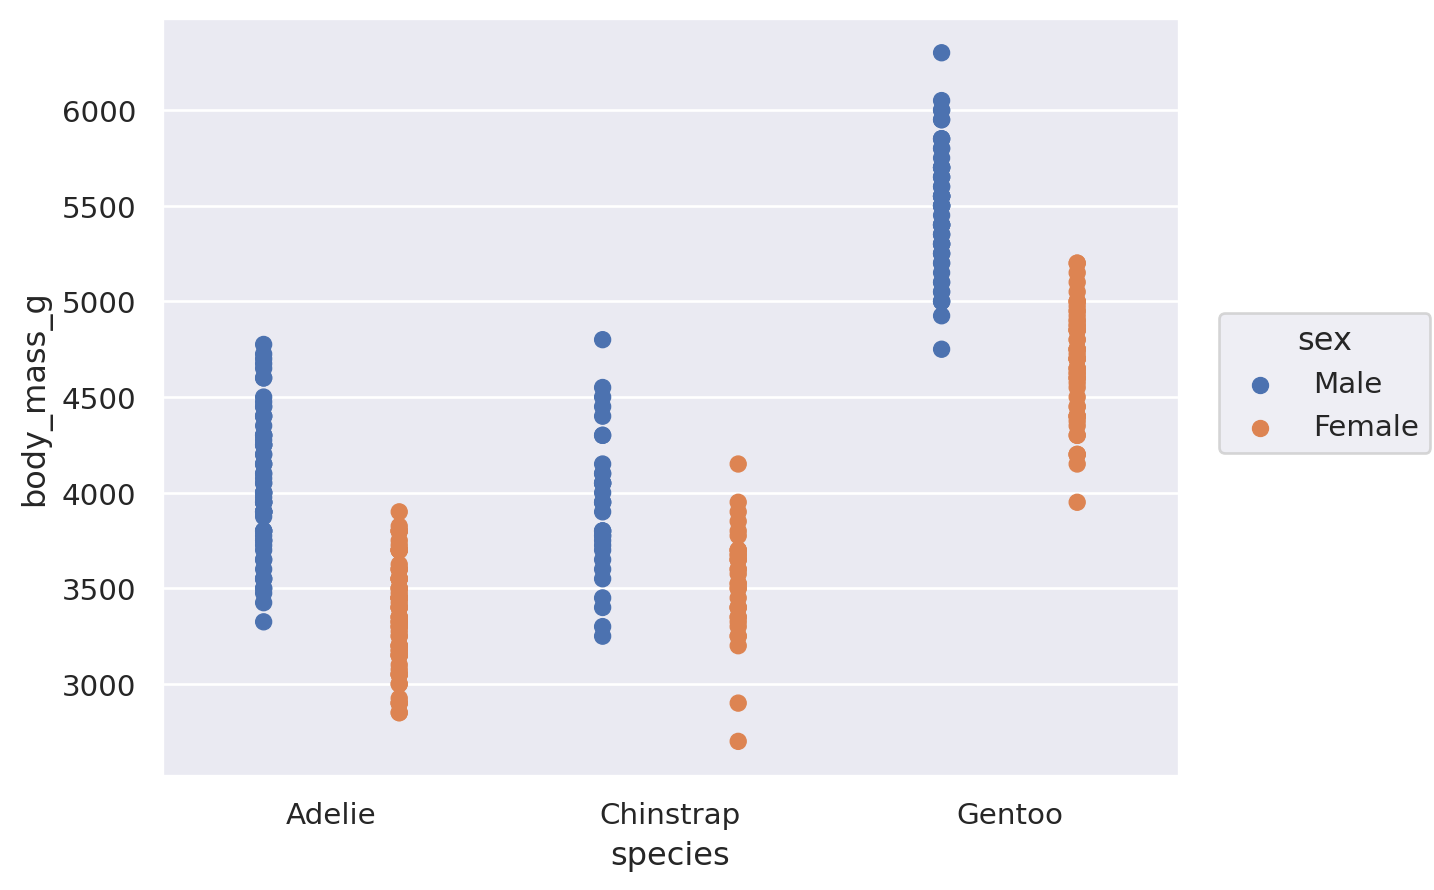

In [14]:
so.Plot(penguins, x="species", y="body_mass_g", color="sex").add(so.Dot(), so.Dodge())

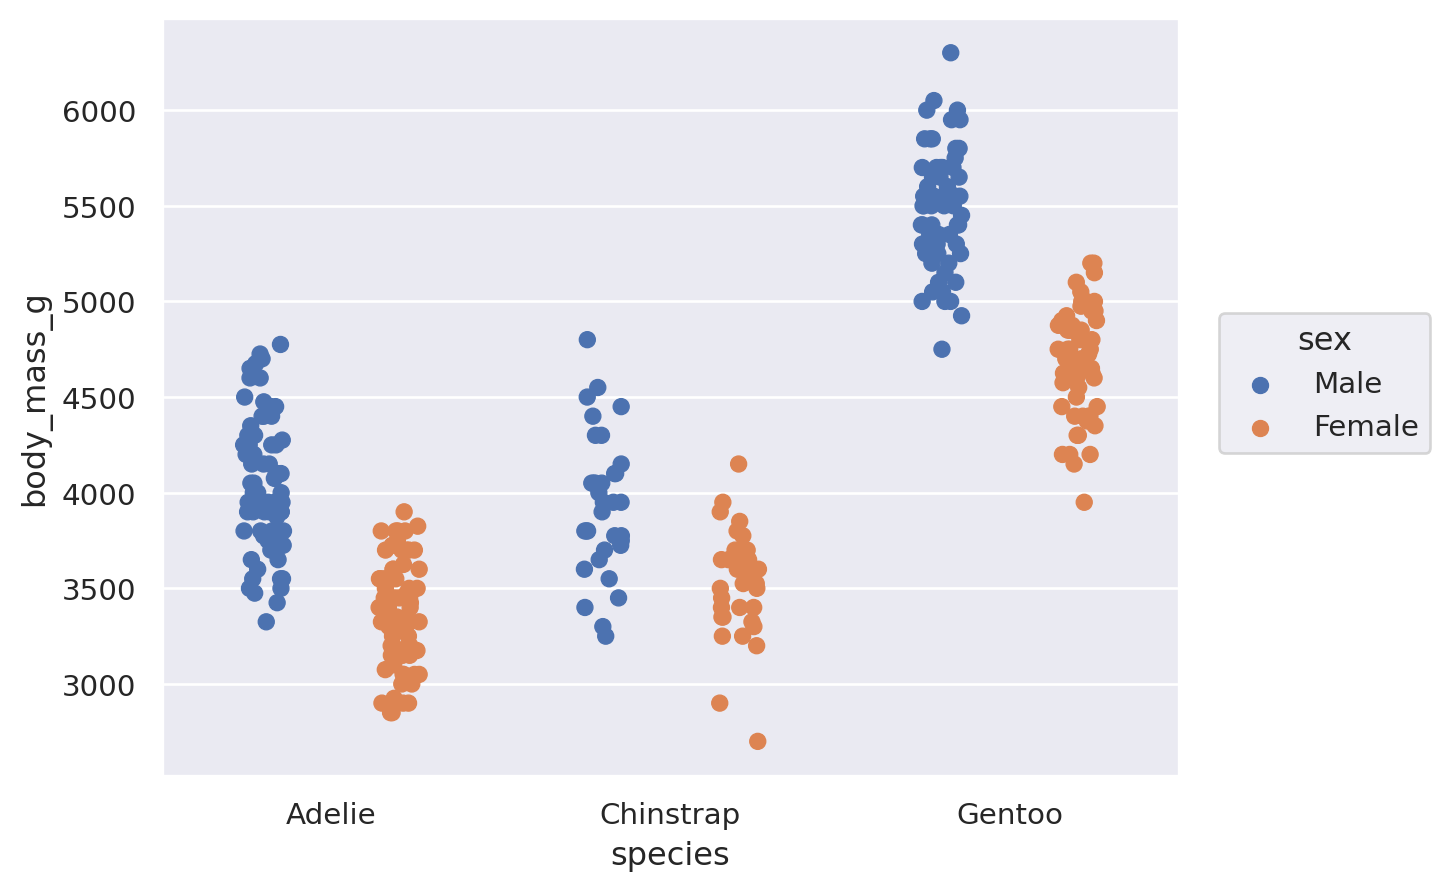

In [15]:
# 여러 이동 작업을 순서대로 적용할 수도 있습니니다.
so.Plot(penguins, x="species", y="body_mass_g", color="sex").add(so.Dot(), so.Dodge(), so.Jitter(.3))

## Creating variables through transformation
`Agg` 통계는 `x`와 `y`가 모두 정의되어 있어야 하지만 통계 변환을 통해 변수를 만들 수도 있습니다. 예를 들어, `Hist` 통계는 `x` 또는 `y` 중 하나만 정의하면 되며 관찰을 세어 다른 하나를 생성합니다.

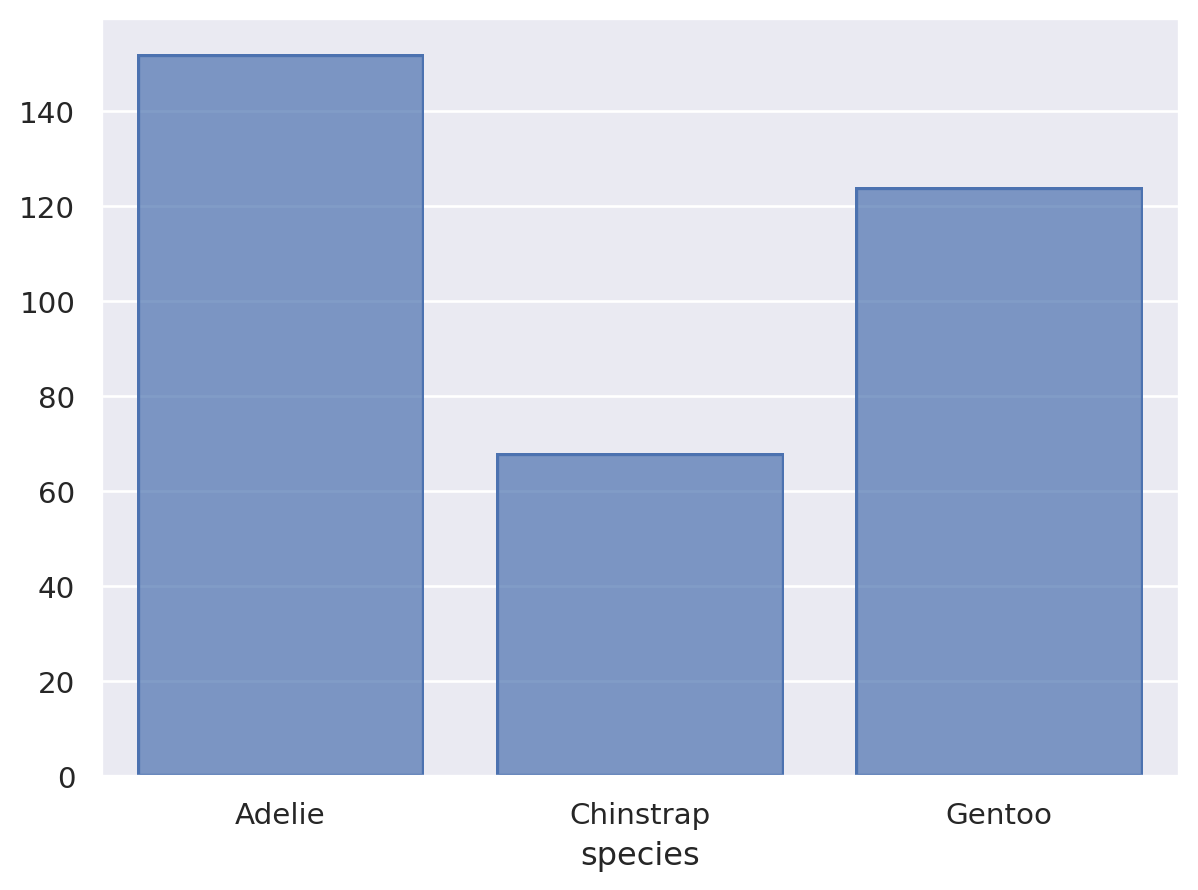

In [16]:
so.Plot(penguins, x="species").add(so.Bar(), so.Hist())

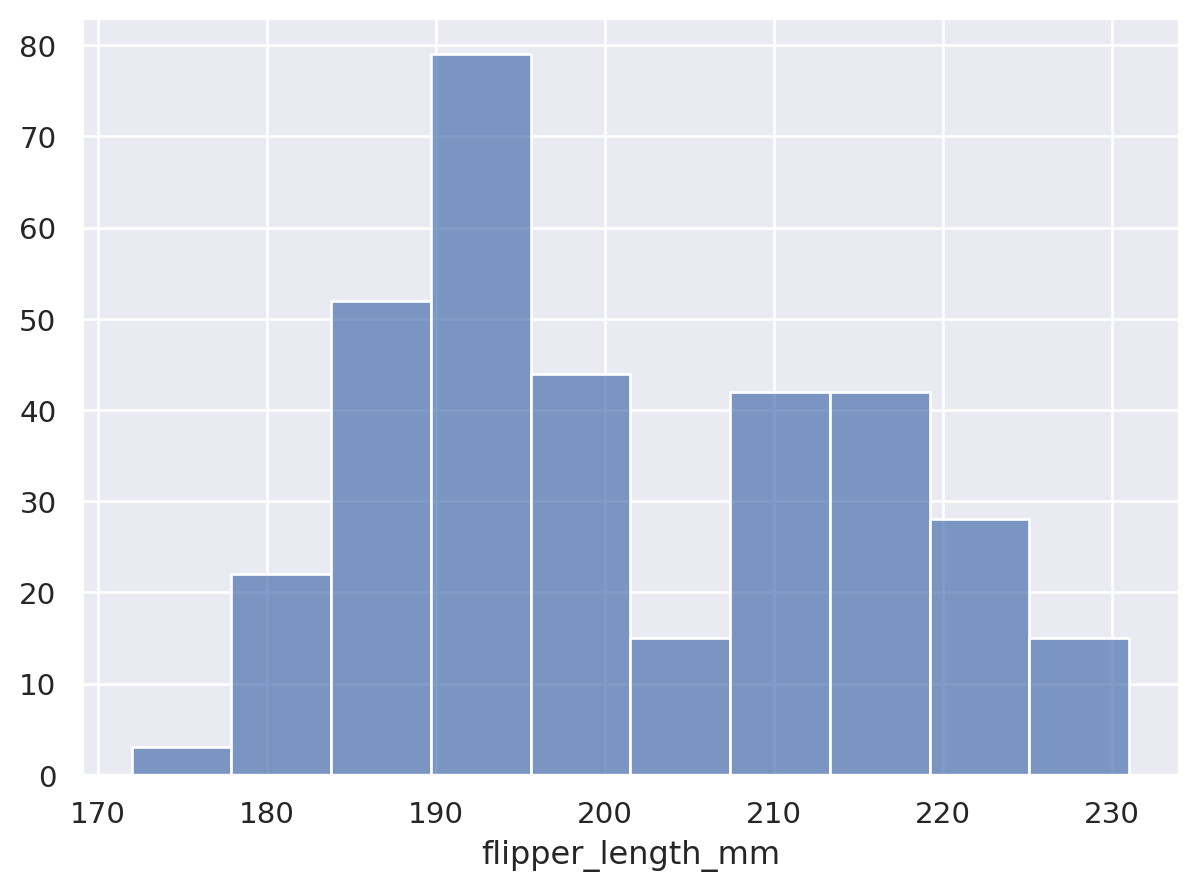

In [17]:
# 히스트 통계는 또한 숫자 데이터가 주어질 때 새로운 x 값(비닝으로)을 생성합니니다.
so.Plot(penguins, x="flipper_length_mm").add(so.Bars(), so.Hist())

- 연속 x축이 있는 플롯에서는 막대 대신 막대를 사용한 방법에 주목해야 합니다.
- 이 두 마크는 관련이 있지만 막대는 기본값이 다르며 연속 히스토그램에 더 잘 작동합니다. 또한 보다 효율적인 다른 matplotlib 아티스트를 생성합니다. 
- 다른 곳에서 단수/복수 표시의 패턴을 찾을 수 있습니다. 복수 버전은 일반적으로 마크 수가 많은 경우에 최적화되어 있습니다.
- 일부 변환은 x와 y를 모두 허용하지만 각 좌표에 대한 간격 데이터를 추가합니다. 이는 집계 후 오류 막대를 플로팅하는 데 특히 적합합니다.

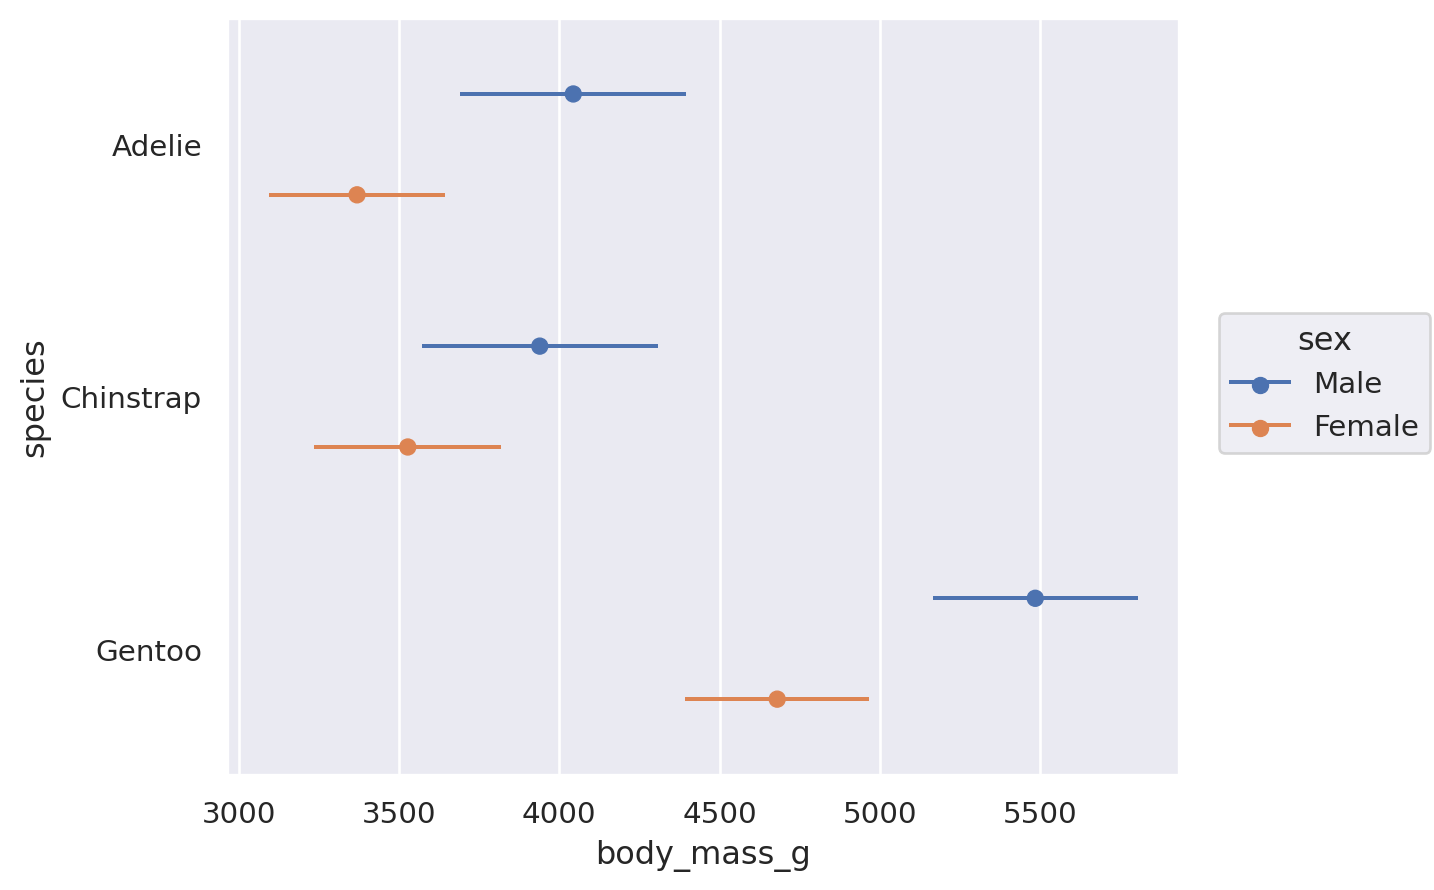

In [18]:
so.Plot(penguins, x="body_mass_g", y="species", color="sex").add(so.Range(), so.Est(errorbar="sd"), so.Dodge()).add(so.Dot(), so.Agg(), so.Dodge())

## Orienting marks and transforms
  막대를 집계, 회피 및 그릴 때 x 및 y 변수가 다르게 처리됩니다.
각 작업에는 오리엔테이션의 개념이 있습니다. 플롯은 변수의 데이터 유형을 기반으로 방향을 자동으로 결정하려고 시도합니다. 예를 들어 `species` 와 `body_mass_g`의 할당을 뒤집으면, 동일한 플롯을 얻을 수 있지만 수평 방향입니다.

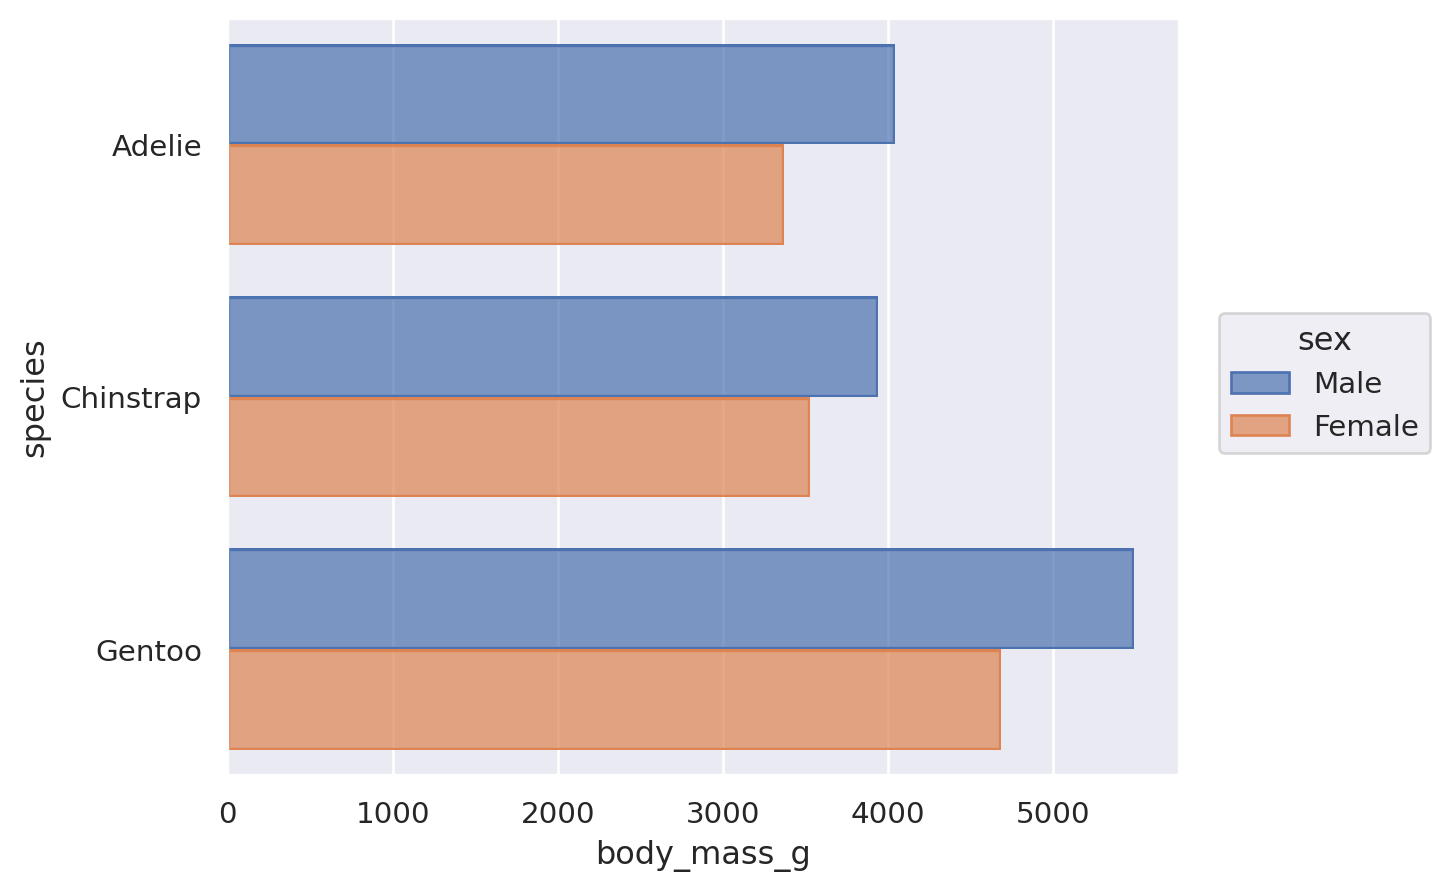

In [19]:
so.Plot(penguins, x="body_mass_g", y="species", color="sex").add(so.Bar(), so.Agg(), so.Dodge())

- 경우에 따라 x 및 y 변수가 모두 숫자일 때와 같이 올바른 방향이 모호합니니다. 이러한 경우 `Plot.add()`에 `orient` 매개변수를 전달하여 명시적으로 지정할 수 있습니다.

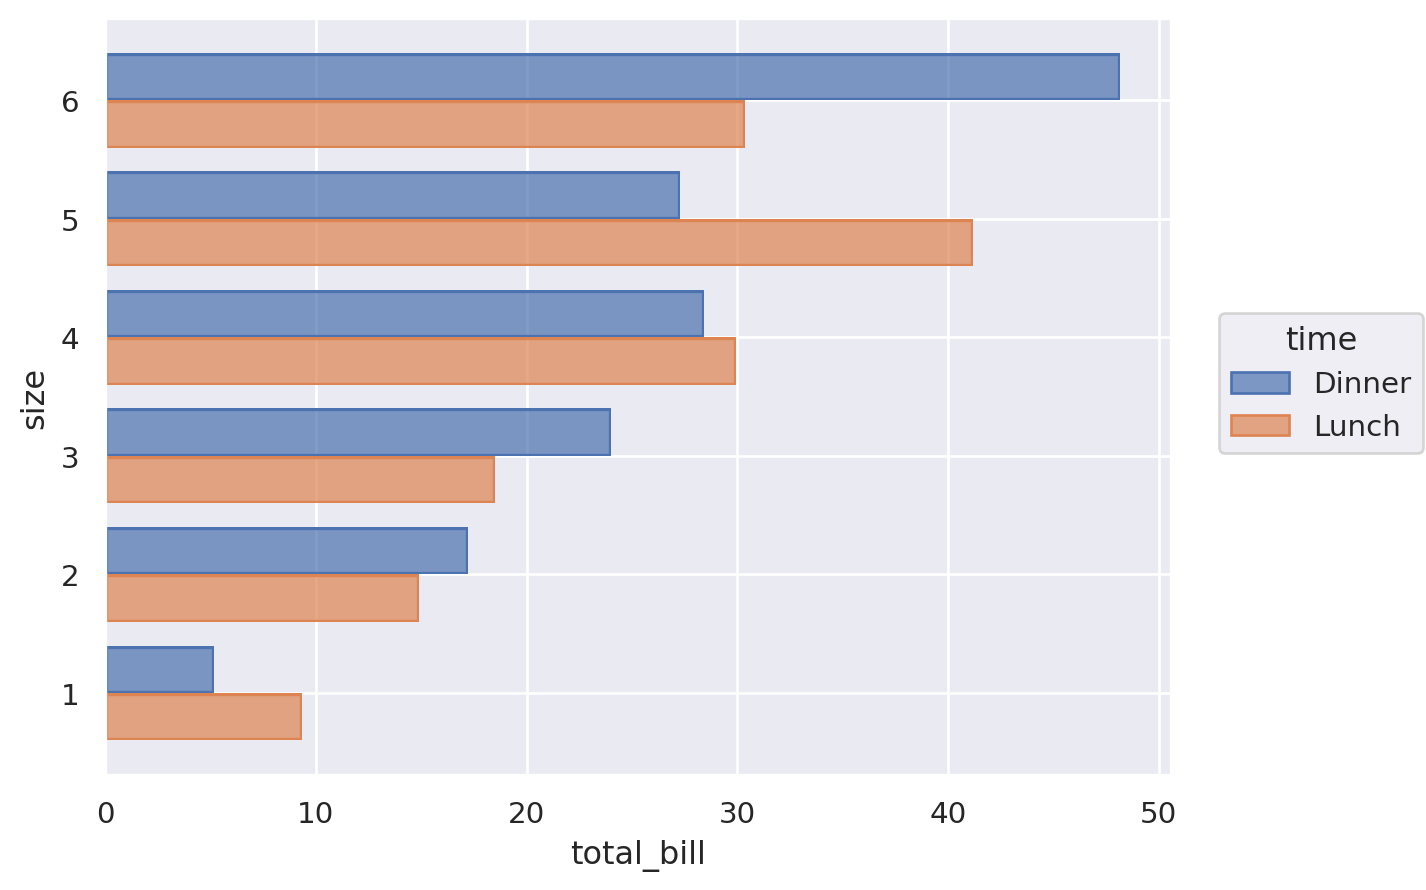

In [20]:
so.Plot(tips, x="total_bill", y="size", color="time").add(so.Bar(), so.Agg(), so.Dodge(), orient="y")

# Building and displaying the plot
지금까지의 각 예는 단일 종류의 마크가 있는 단일 서브플롯을 생성했습니다. 그러나 `Plot`은 이것으로 제한하지 않습니다.

## Adding multiple layers
- `Plot.add()`을 반복적으로 호출하여 더 복잡한 단일 서브플롯 그래픽을 만들 수 있습니다.
- 호출될 때마다 플롯의 레이어를 정의한다. 예를 들어 산점도(지금은 점 사용)를 추가한 다음 회귀 적합을 추가할 수 있습니다.

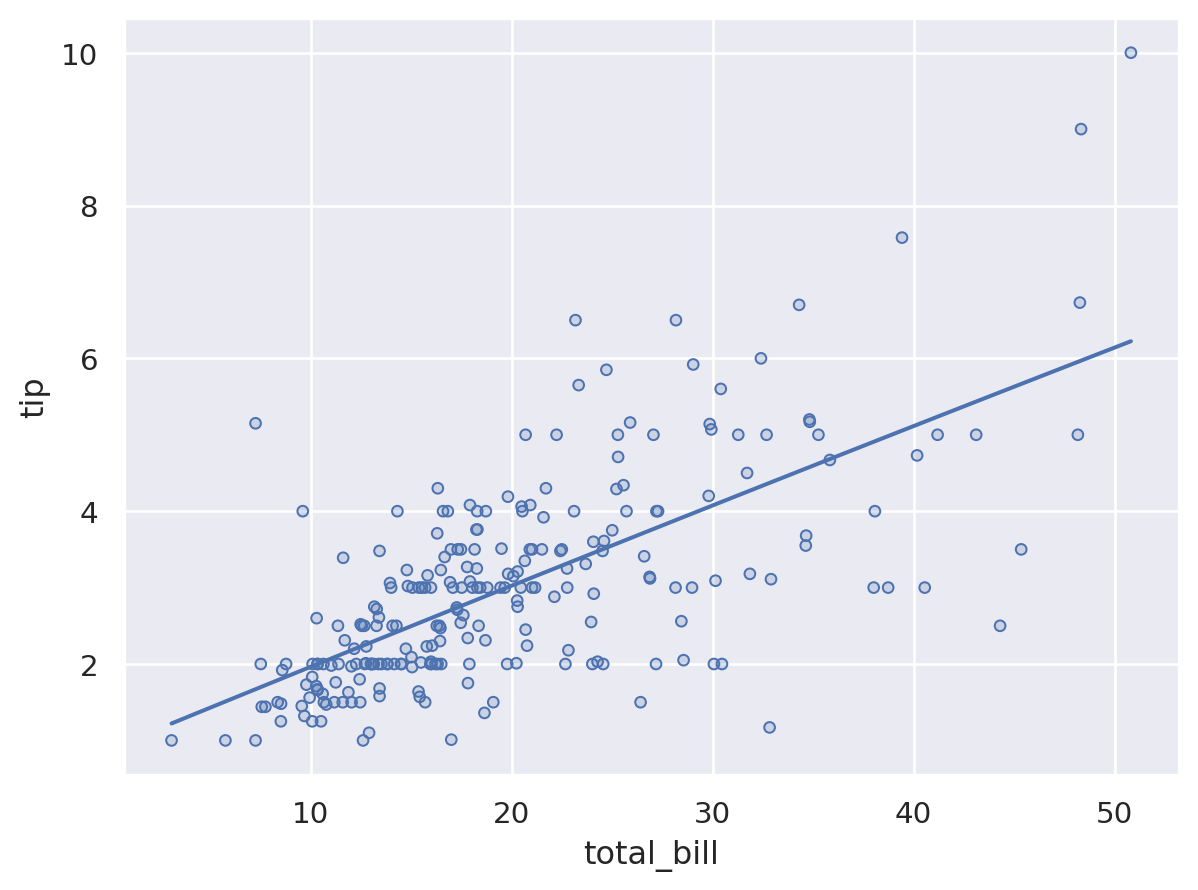

In [21]:
 so.Plot(tips, x="total_bill", y="tip").add(so.Dots()).add(so.Line(), so.PolyFit())

`Plot` 생성자에 정의된 변수 매핑은 모든 레이어에 사용됩니다.

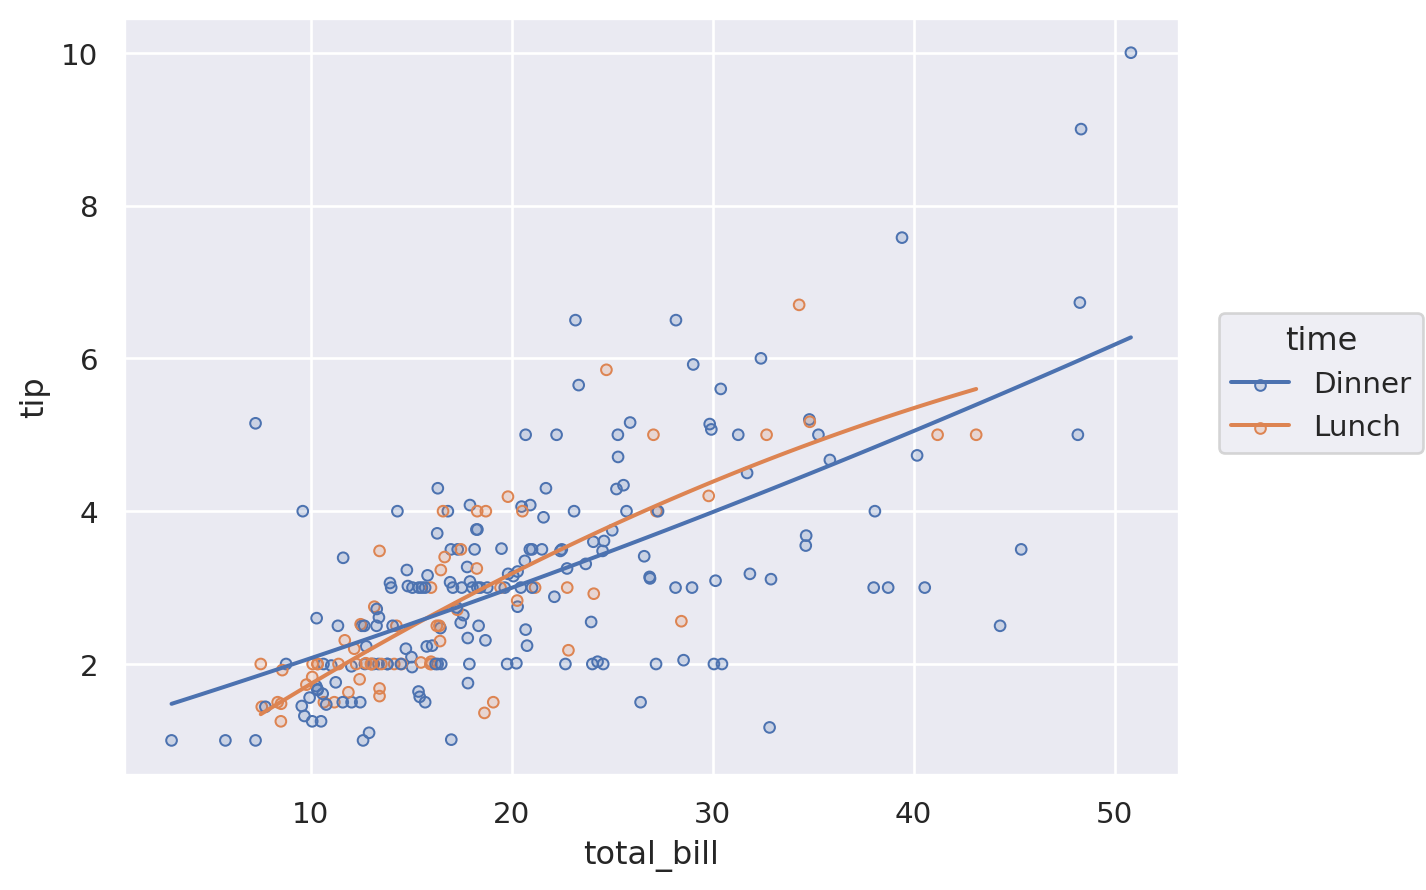

In [22]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

## Layer-specific mapping
특정 계층에서만 사용되도록 매핑을 정의할 수도 있습니다. 이는 관련 계층에 대한 `Plot.add` 호출 내에서 매핑을 정의하여 수행됩니다.

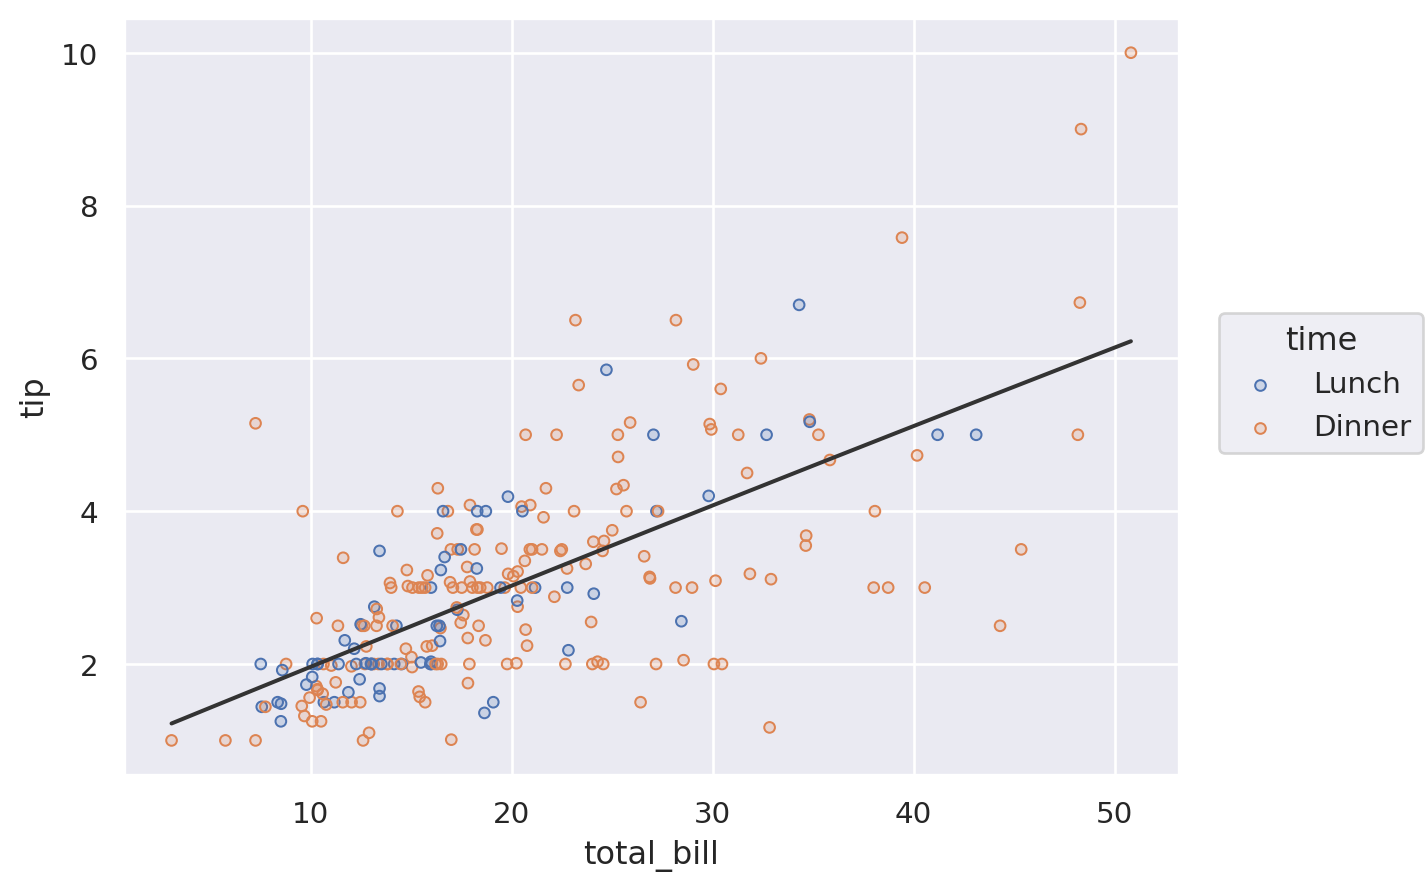

In [23]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots(), color="time")
    .add(so.Line(color=".2"), so.PolyFit())
)

또는 전체 플롯에 대한 레이어를 정의하되 변수를 `None`과 같이 설정하여 특정 레이어에서 제거합니다.

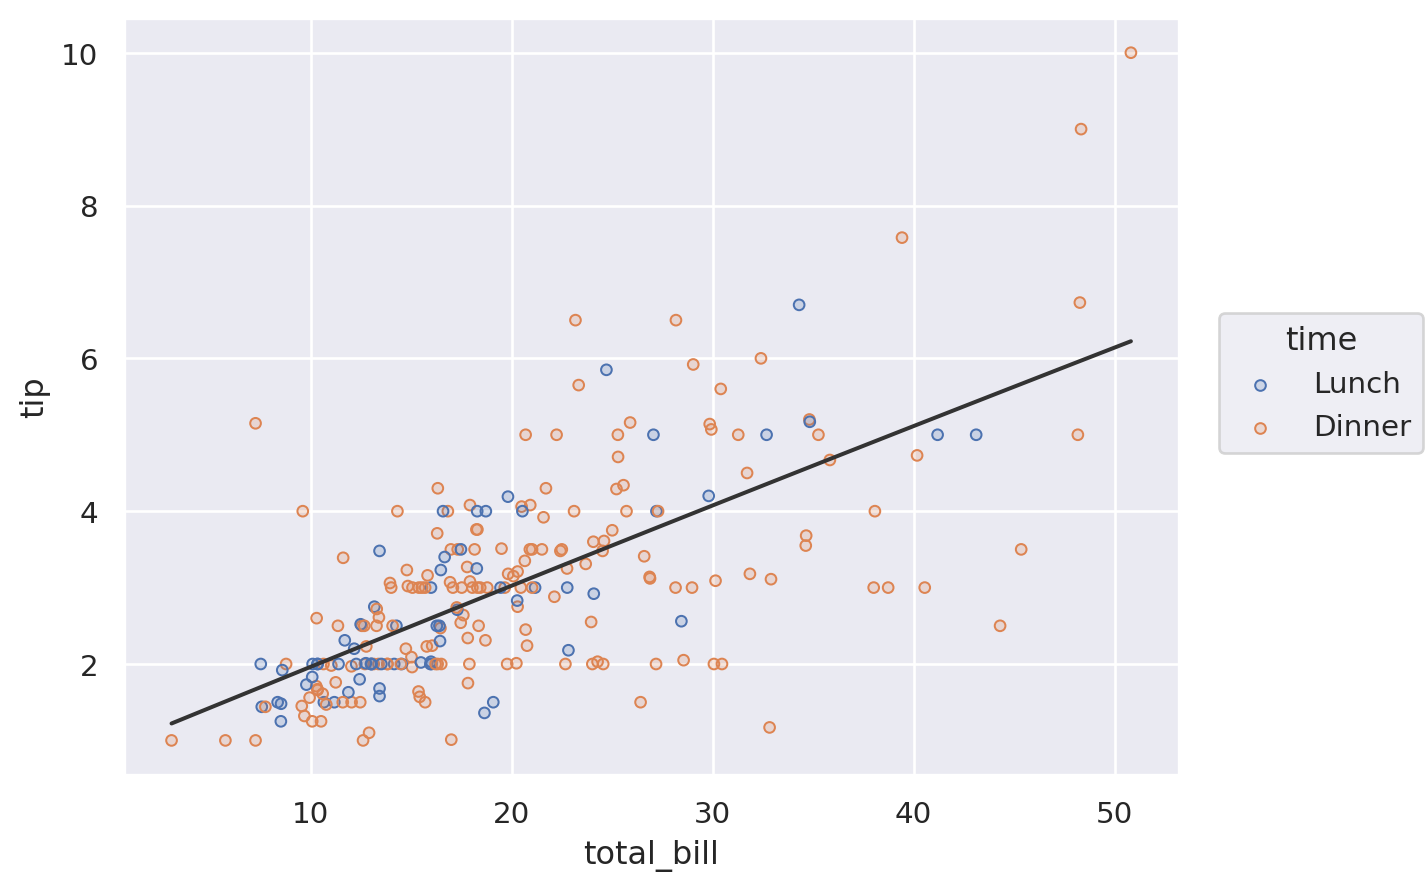

In [24]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(color=".2"), so.PolyFit(), color=None)
)

요약하면 마크 속성 값을 지정하는 세 가지 방법이 있습니다. 
1.  모든 레이어의 변수를 매핑하는 방법
2. 특정 레이어의 변수를 매핑하는 방법
3. 속성 방향을 설정하는 방법
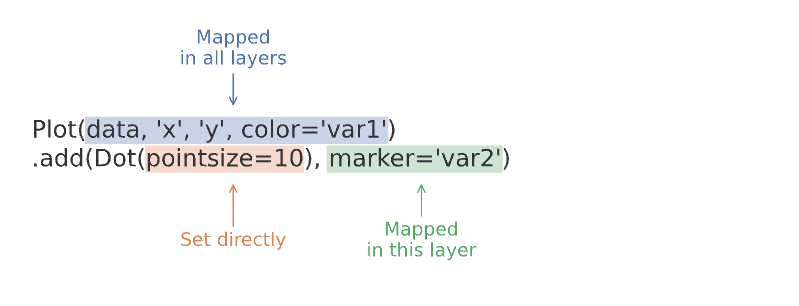

## Faceting and pairing subplots
seaborn의 그림 수준 함수(`seaborn.displot()`, `seaborn.catplot()` 등)와 마찬가지로 `Plot` 인터페이스는 여러 "패싯"이 있는 그림 또는 데이터 하위 집합을 포함하는 하위 그림을 생성할 수도 있습니다. 이는 `Plot.facet()` 메서드를 사용하여 수행됩니다.

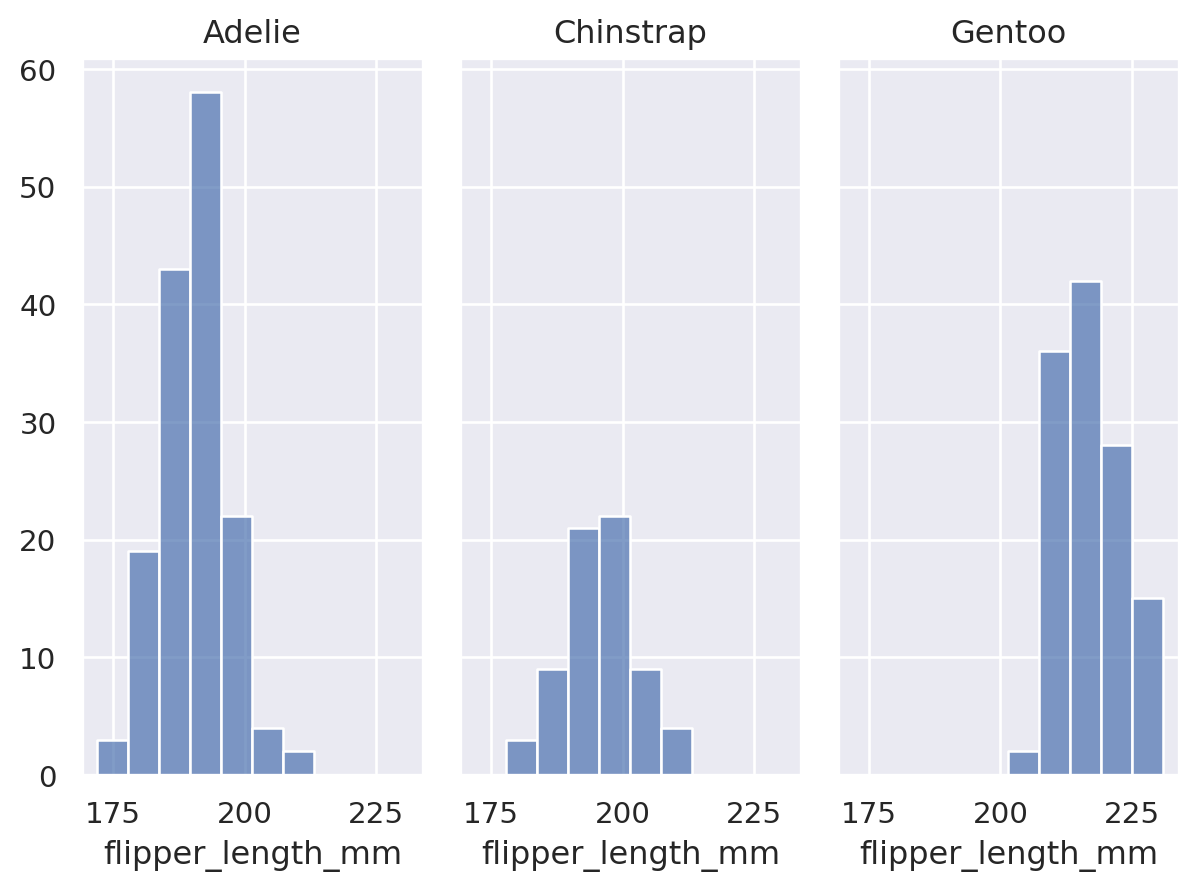

In [25]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet("species")
    .add(so.Bars(), so.Hist())
)


플롯의 열 및/또는 행을 정의하는 데 사용해야 하는 변수와 함께 `Plot.facet()`를 호출합니다.

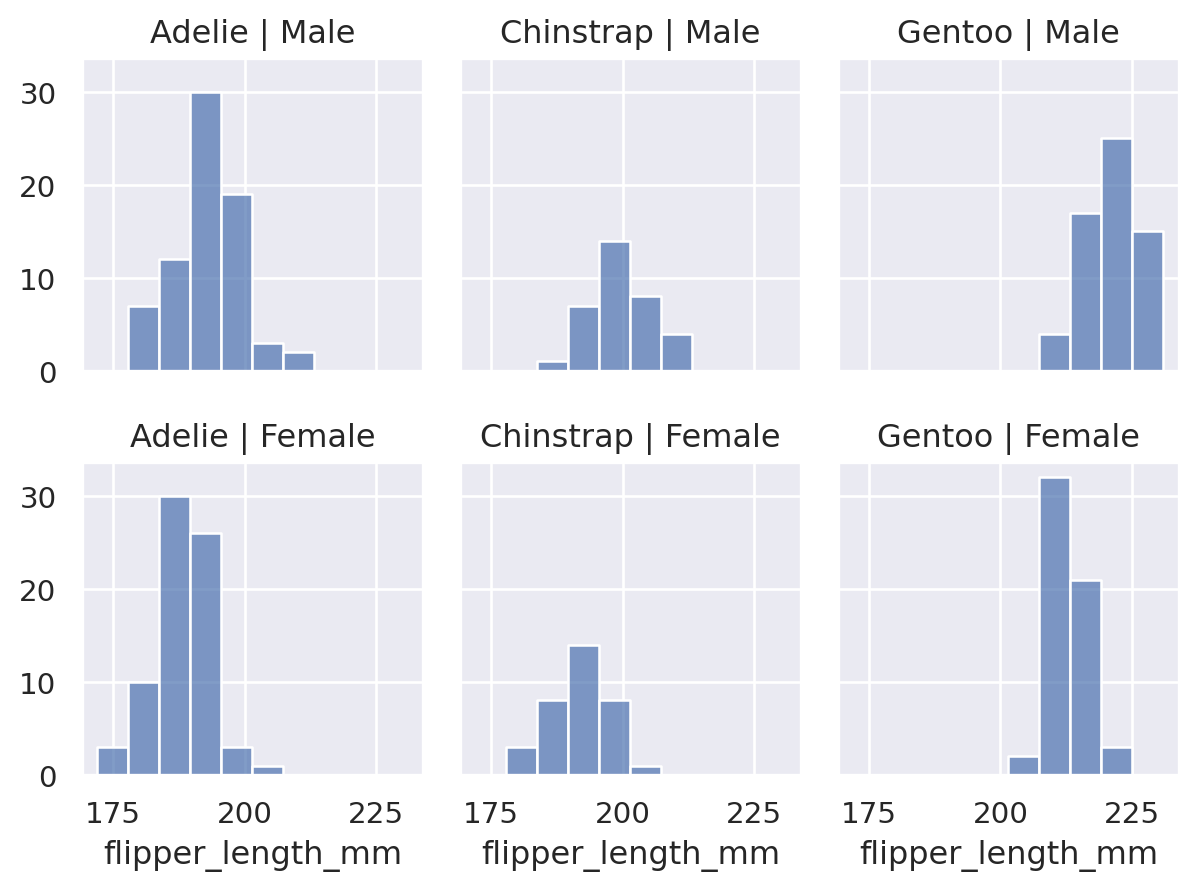

In [26]:
# Plot.facet() 안에 col과 row를 설정합니다.
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

다른 차원에 걸쳐 "래핑"하여 수준 수가 더 많은 변수를 사용하여 패싯할 수 있습니다.

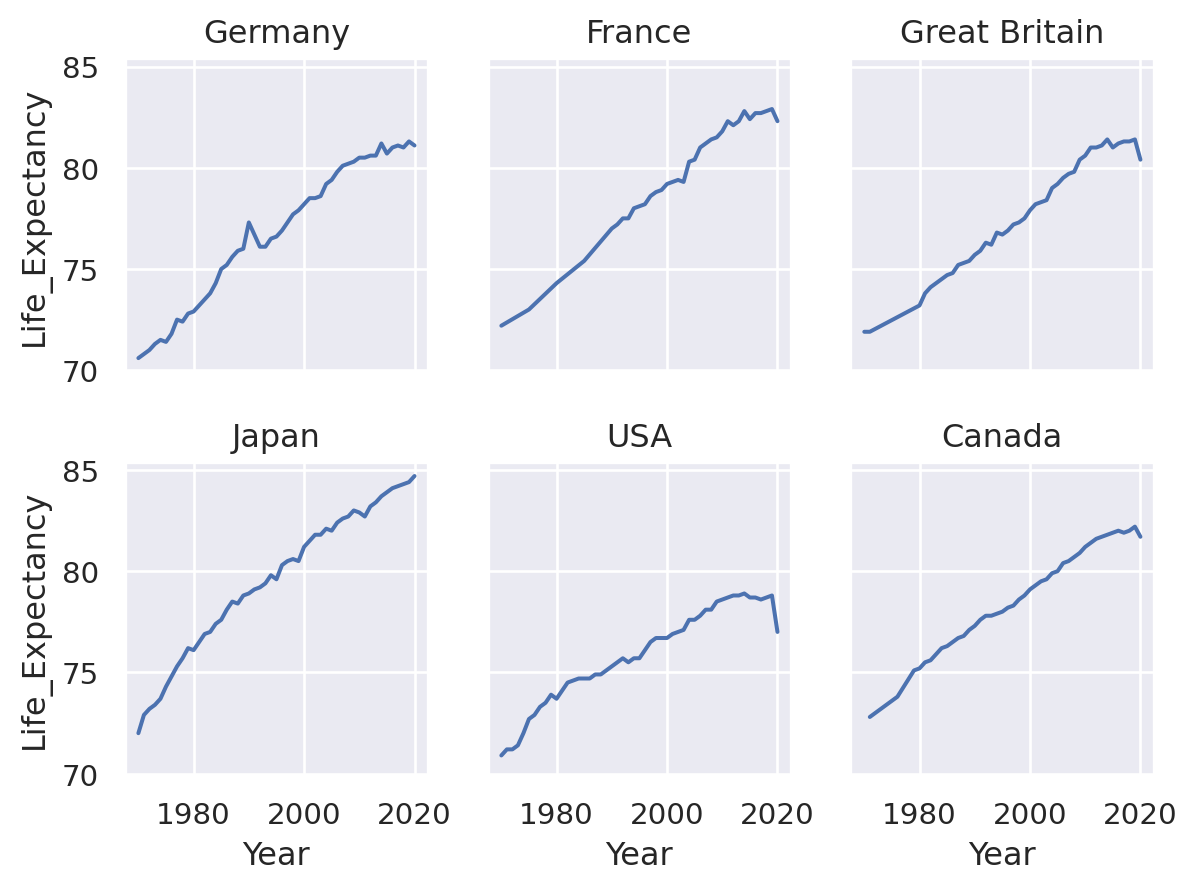

In [27]:
# Plot.facet()안에 wrap을 설정하여 래핑합니다.
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet(col="Country", wrap=3)
    .add(so.Line())
)

모든 레이어는 명시적으로 제외하지 않는 한 패싯이 됩니다. 이는 각 서브플롯에 추가 컨텍스트를 제공하는 데 유용할 수 있습니다.

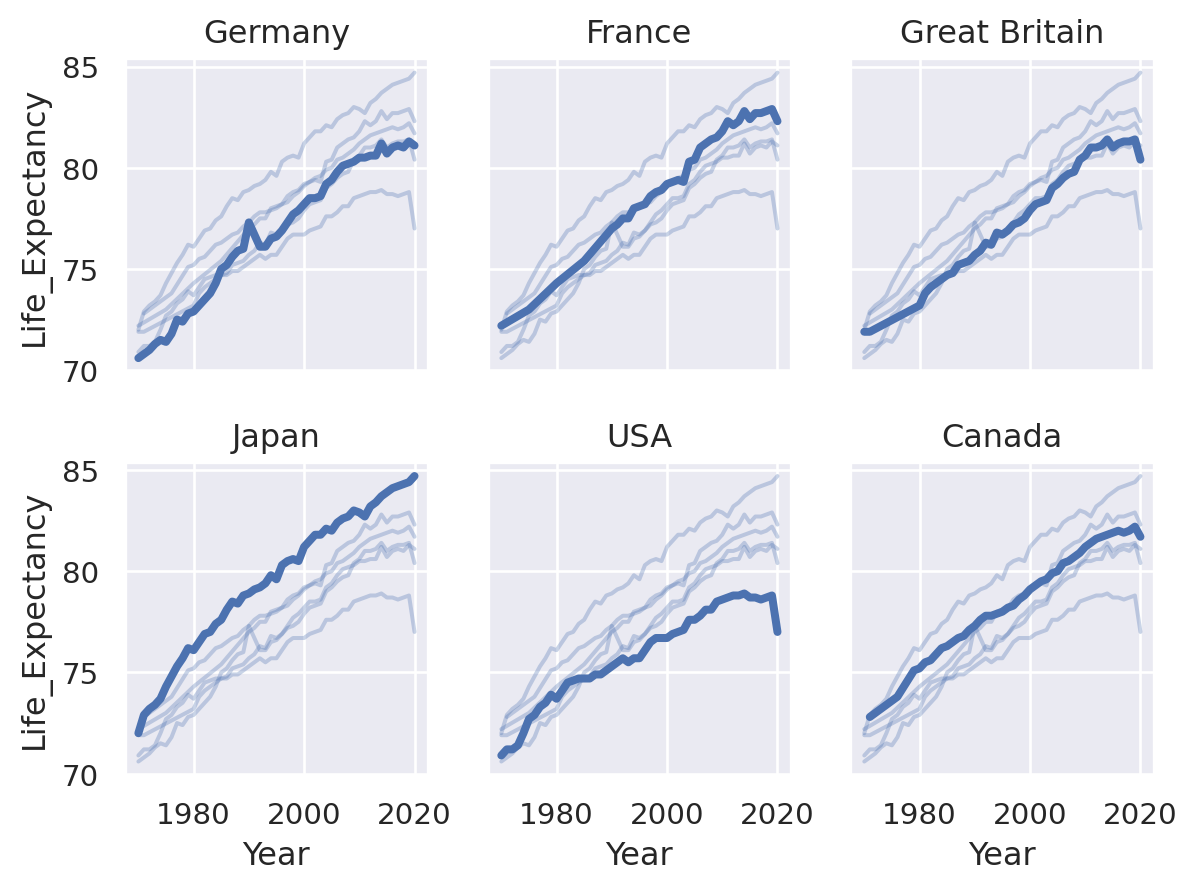

In [28]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet("Country", wrap=3)
    .add(so.Line(alpha=.3), group="Country", col=None)
    .add(so.Line(linewidth=3))
)

서브플롯을 생성하는 다른 방법은 `Plot.pair()`입니다. `seaborn.PairGrid`와 마찬가지로 x 및/또는 y 좌표에 대해 서로 다른 변수를 사용하여 각 서브플롯에 모든 데이터를 그립니다.

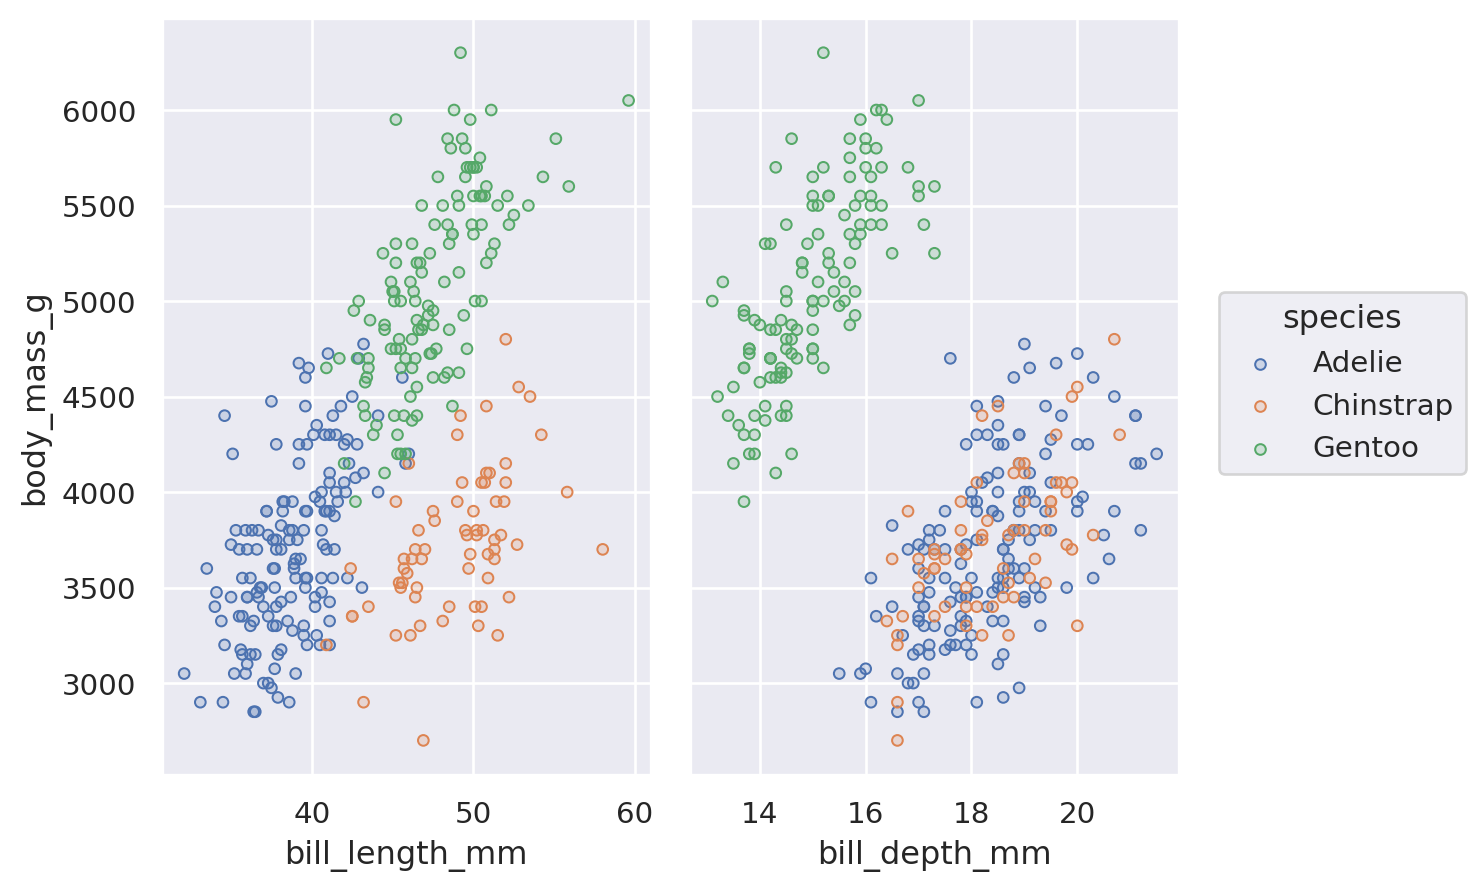

In [29]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .add(so.Dots())
)

작업이 반대 차원에 서브플롯을 추가하는 한 패싯 및 페어링을 결합할 수 있습니다.

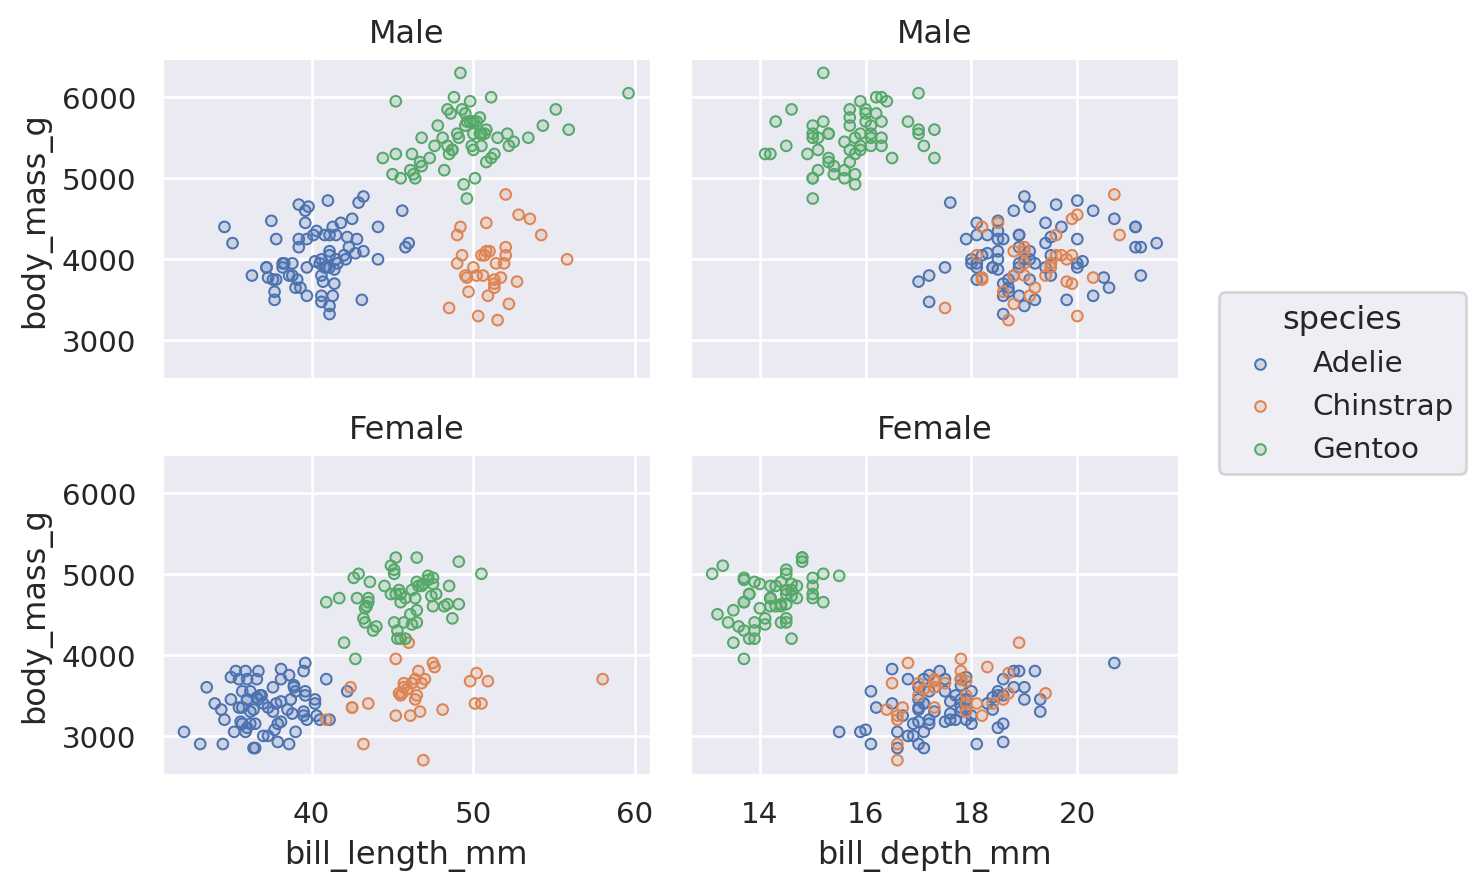

In [30]:
# 위 그래프에서 .facet(row="sex")가 추가된 모습.
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="sex")
    .add(so.Dots())
)

## Integrating with matplotlib
- `Plot.facet()` 또는 `Plot.pair()`가 제공할 수 있는 것보다 더 복잡한 구조를 가진 그림에 여러 서브플롯을 표시하려는 경우가 있을 수 있습니다.
- 현재 솔루션은 그림 설정을 matplotlib에 위임하고 `Plot`이 `Plot.on()` 메서드와 함께 사용해야 하는 matplotlib 객체를 제공하는 것입니다.
- 이 객체는 `matplotlib.axes.Axes`, `matplotlib.figure.Figure` 또는 `matplotlib.figure.SubFigure`일 수 있습니다. 후자는 맞춤형 서브플롯 레이아웃을 구성하는 데 가장 유용합니다.

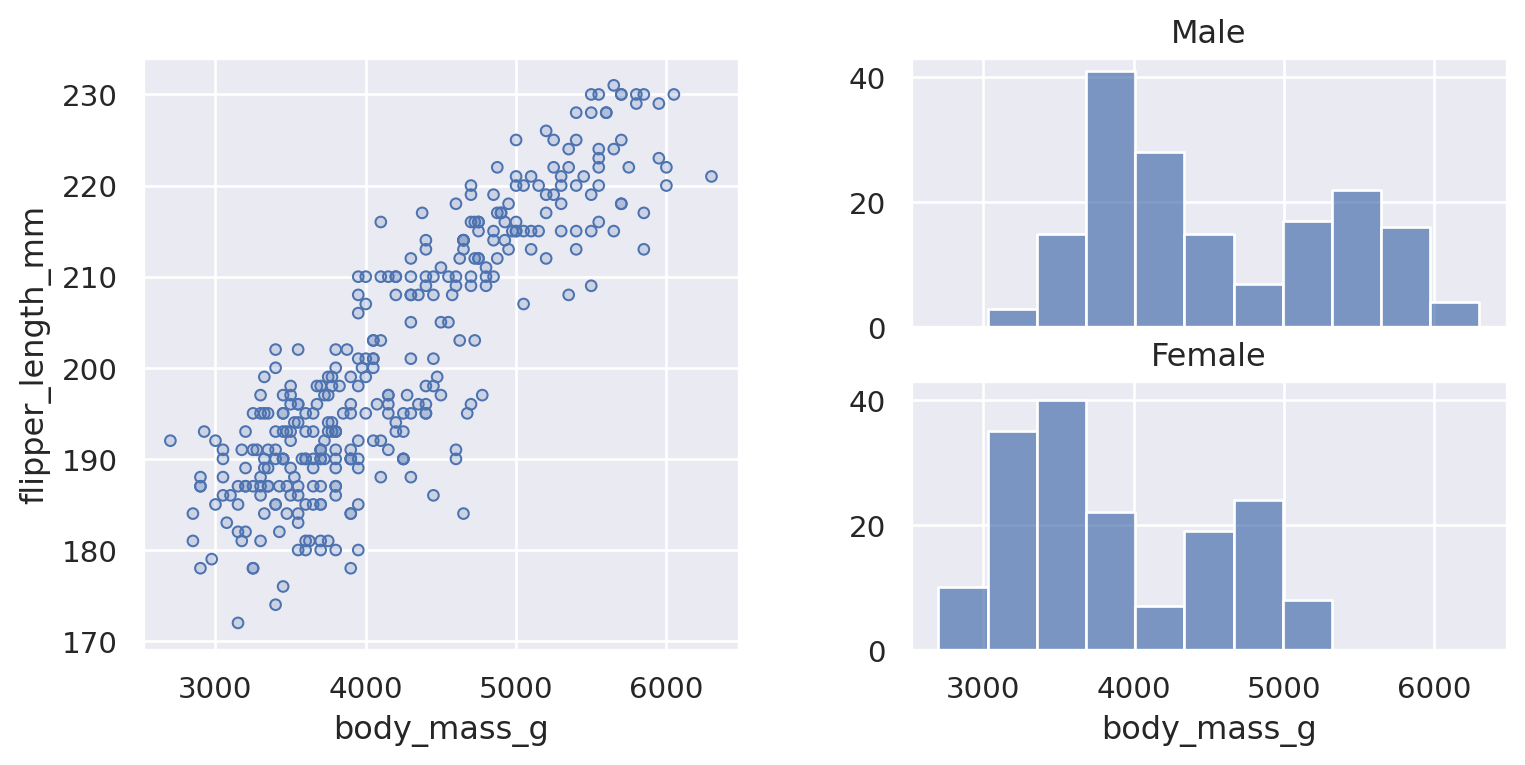

In [31]:
import matplotlib as mpl

f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

## Building and displaying the plot
- 알아야 할 중요한 점은 `Plot` 메소드가 호출된 객체를 복제하고 객체를 제자리에서 업데이트하는 대신 해당 복제본을 반환한다는 것입니다.
- 즉, 일반적인 플롯 사양을 정의한 다음 이에 대한 여러 변형을 생성할 수 있습니다.
- 따라서 다음 기본 사양을 사용합니다.

In [32]:
# 기본사양
p = so.Plot(healthexp, "Year", "Spending_USD", color="Country")

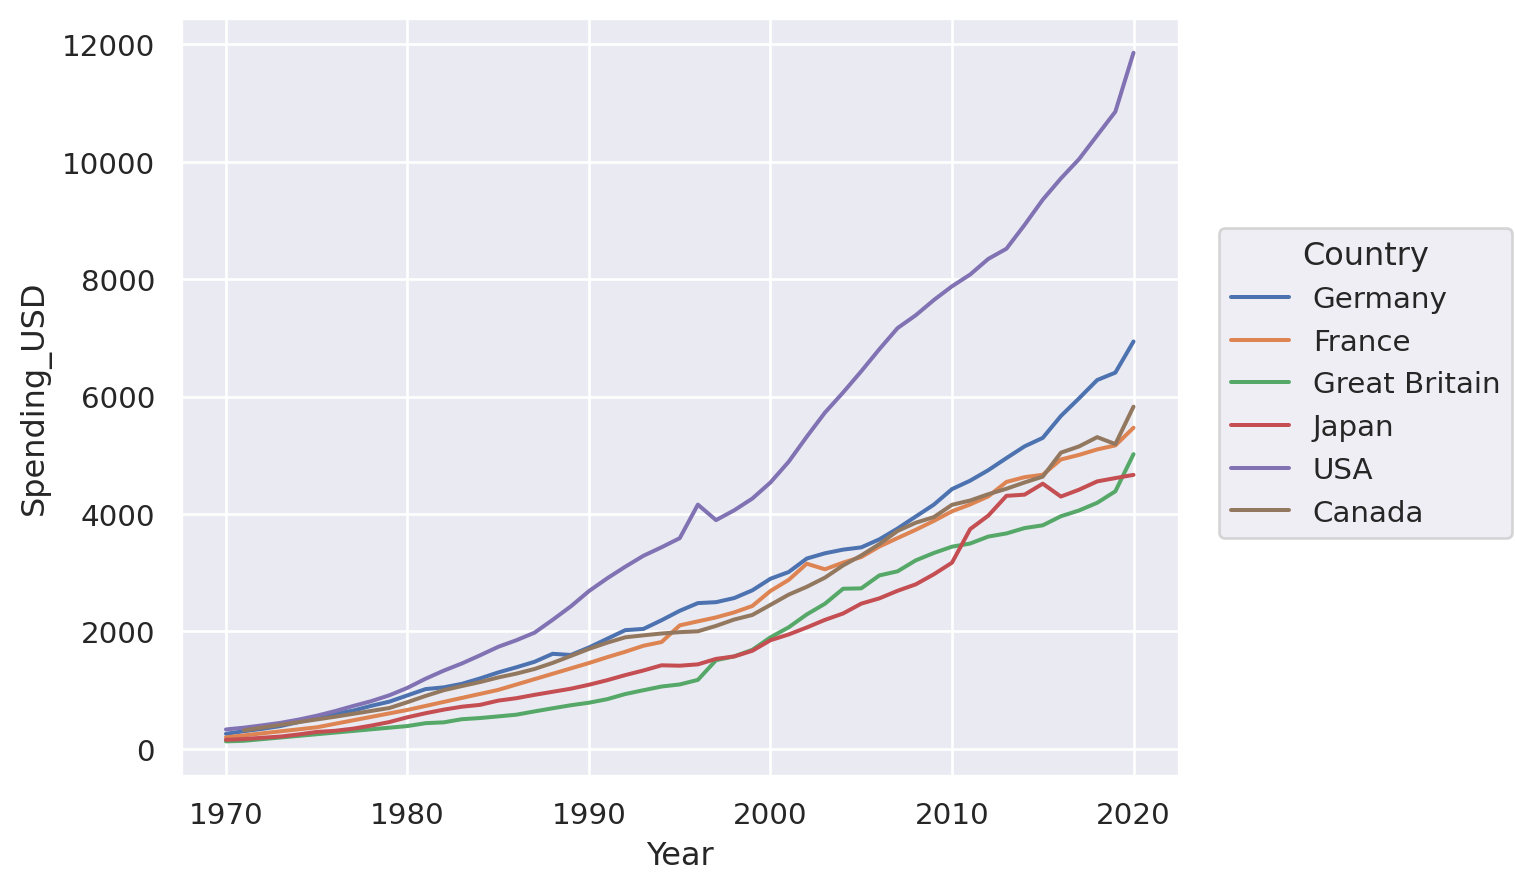

In [33]:
# line plot 그리기
p.add(so.Line())

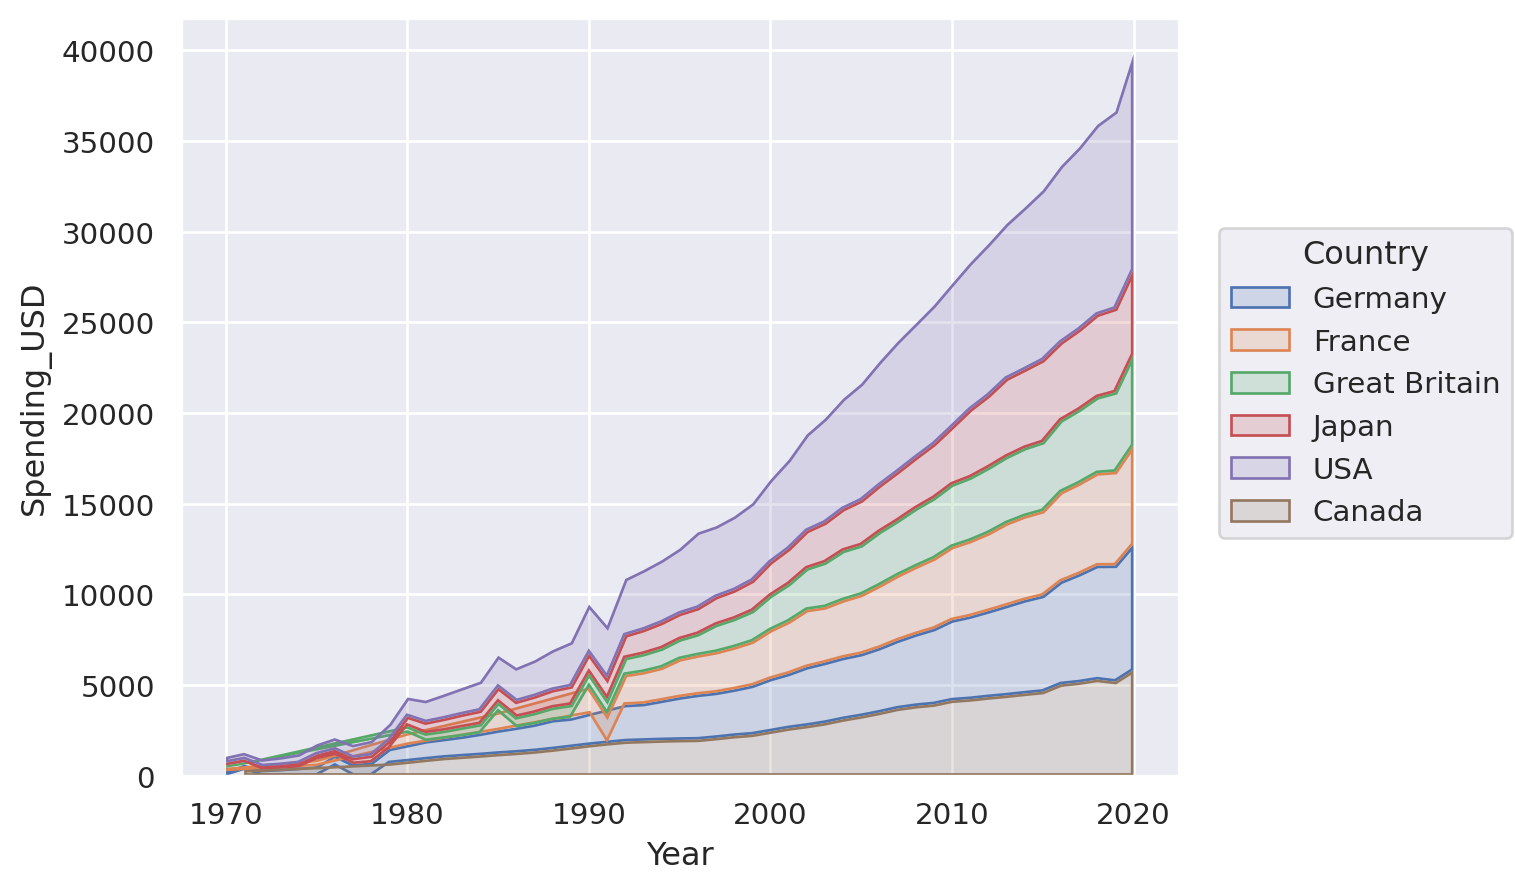

In [34]:
#  누적영역 plot 그리기
p.add(so.Area(), so.Stack())

- `Plot` 메서드는 완전히 선언적입니다. 그것들을 호출하면 플롯 사양이 업데이트되지만 실제로 플로팅을 수행하지는 않습니다. 이것의 한 가지 결과는 메서드가 임의의 순서로 호출될 수 있고 많은 메서드가 여러 번 호출될 수 있다는 것입니다.
- 플롯은 실제로 언제 렌더링됩니까? `Plot`은 노트북 환경에서 사용하기에 최적화되어 있습니다. `Plot`이 Jupyter REPL에 표시되면 렌더링이 자동으로 트리거됩니다. 그렇기 때문에 `Plot`을 정의했지만 REPL로 반환하지 않고 p에 할당한 위의 예에서 아무 것도 볼 수 없었습니다.
- 노트북에서 플롯을 보려면 셀의 마지막 줄에서 플롯을 반환하거나 개체에서 Jupyter에 내장된 `display` 기능을 호출하십시오. 노트북 통합은 `matplotlib.pyplot`을 완전히 우회하지만 `Plot.show()`를 호출하여 다른 컨텍스트에서 그림 표시 장치를 사용할 수 있습니다.
- `Plot.save()`를 호출하여 플롯을 파일(또는 버퍼)에 저장할 수도 있습니다.

# Customizing the appearance

새로운 인터페이스는 `Plot`을 통해 많은 양의 사용자 정의를 지원하여 기어를 전환하고 matplotlib 기능을 직접 사용할 필요성을 줄이는 것을 목표로 합니다. (하지만 기다려주십시오. 이 목표를 달성하는 데 필요한 모든 기능이 구현된 것은 아닙니다!)

## Parameterizing scales
모든 데이터 종속 속성은 `Scale` 및 `Plot.scale()` 메서드의 개념으로 제어됩니다. 이 메서드는 여러 가지 유형의 인수를 허용합니다. matplotlib에서 척도를 사용하는 것과 가장 가까운 한 가지 가능성은 좌표를 변환하는 함수의 이름을 전달하는 것입니다.

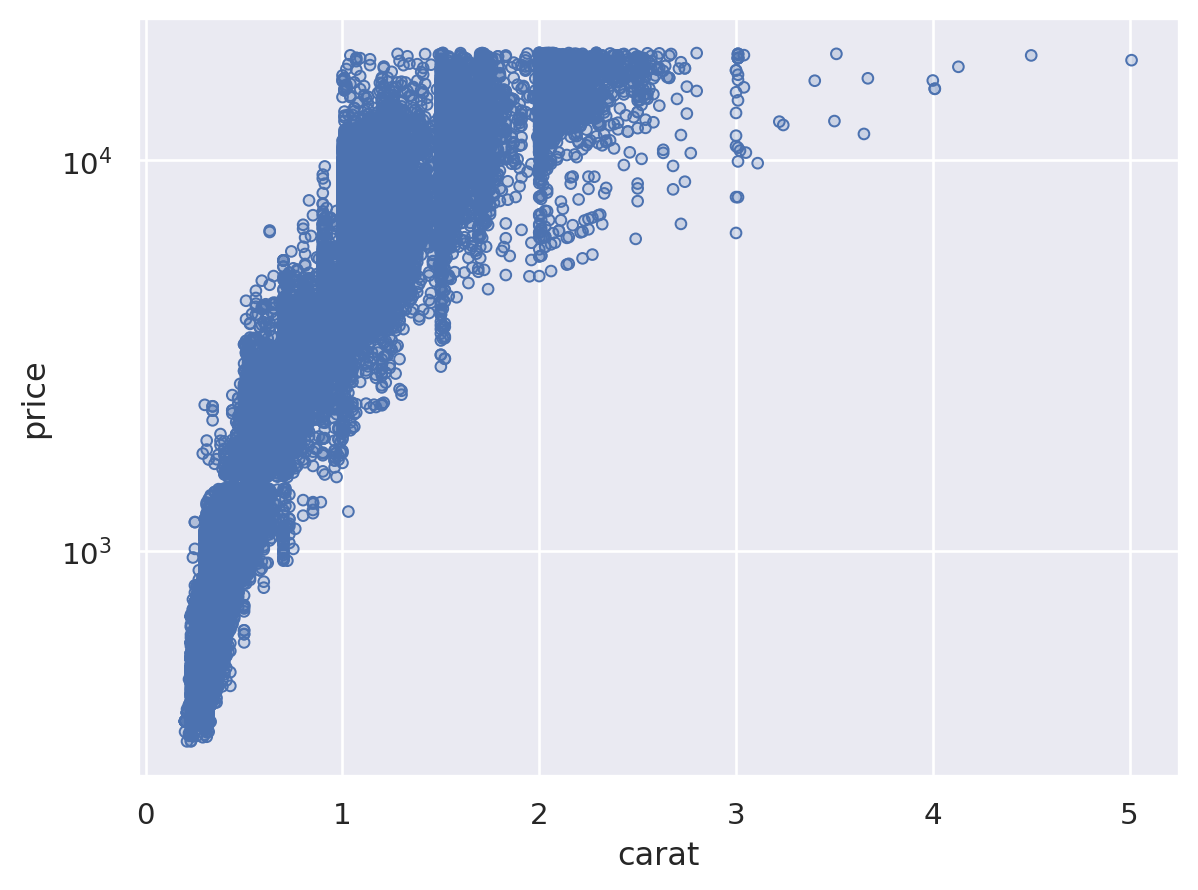

In [35]:
diamonds = sns.load_dataset("diamonds")
(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dots())
    .scale(y="log")
)

`Plot.scale()`은 또한 `색상`과 같은 의미론적 속성에 대한 매핑을 제어할 수 있습니다. seaborn의 함수 인터페이스에서 `palette` 매개변수에 전달할 모든 인수를 직접 전달할 수 있습니다.

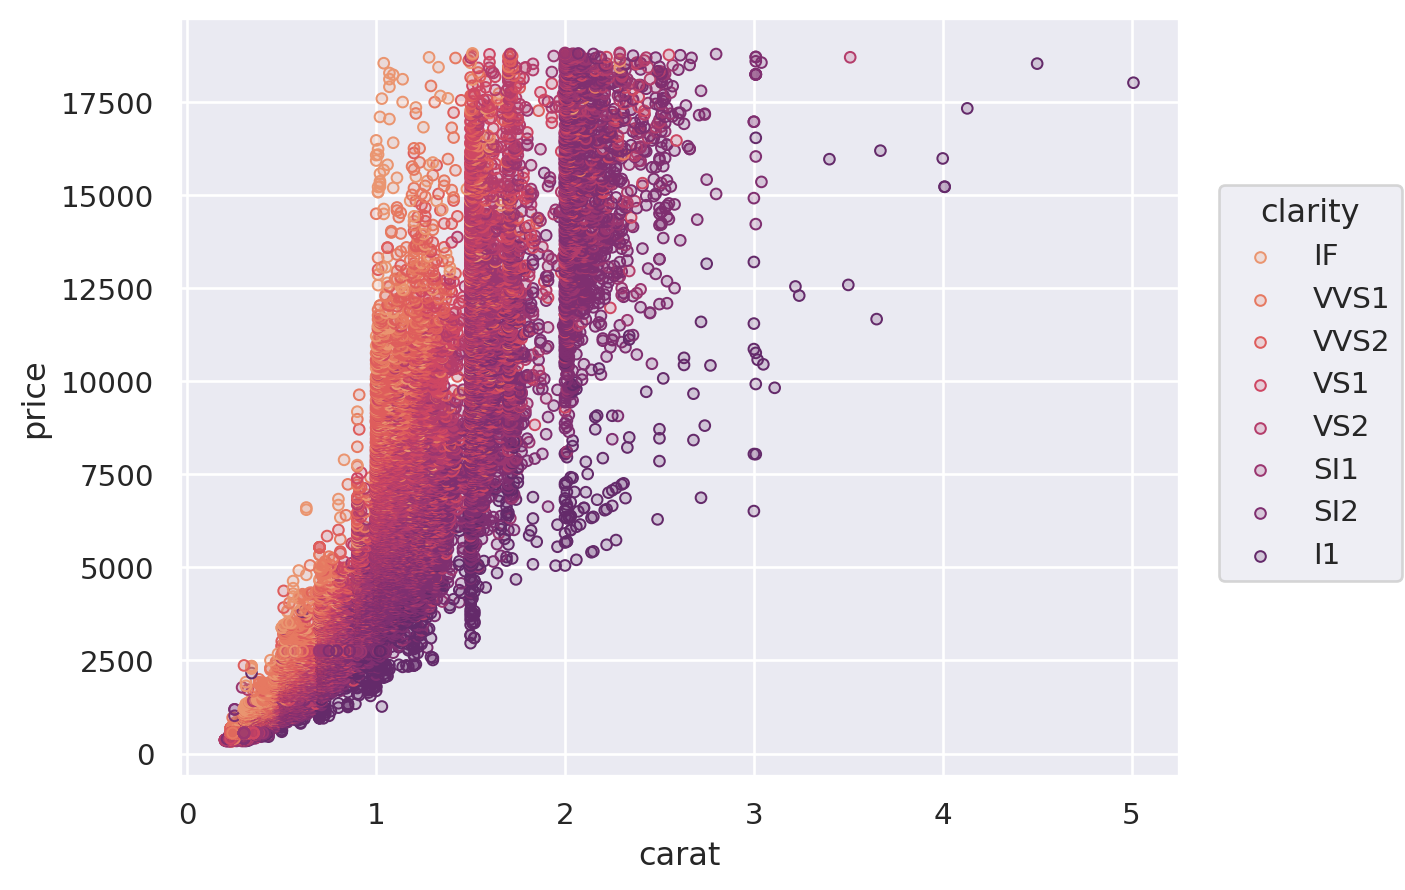

In [36]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity")
    .add(so.Dots())
    .scale(color="flare")
)


또 다른 옵션은 척도가 매핑되어야 하는 범위를 제어하는 ​​`(min, max)` 값의 튜플을 제공하는 것입니다. 이는 숫자 속성과 색상 모두에 적용됩니다.

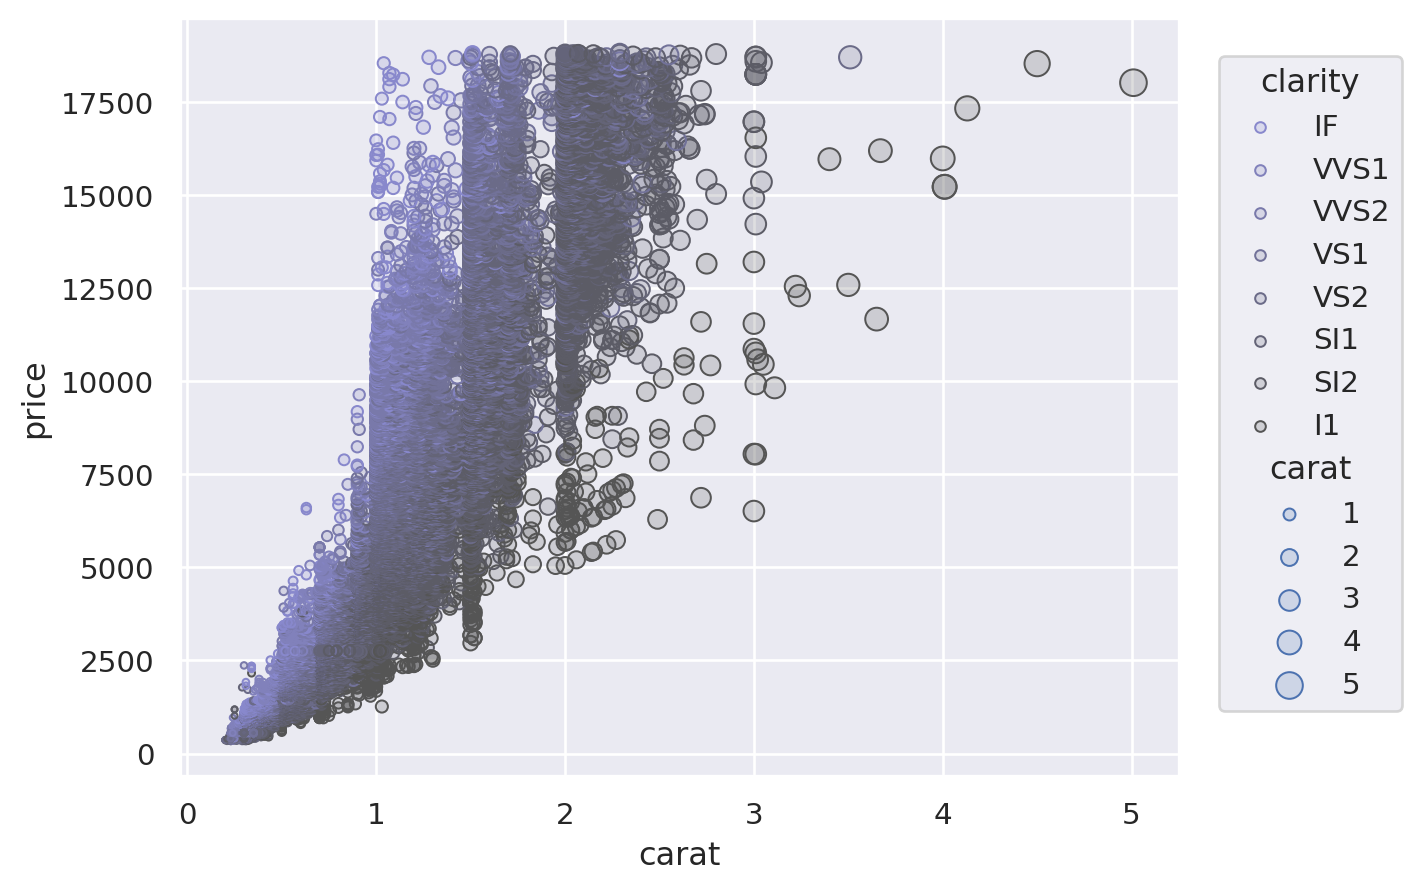

In [37]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity", pointsize="carat")
    .add(so.Dots())
    .scale(color=("#88c", "#555"), pointsize=(2, 10))
)

추가 제어를 위해 `Scale` 개체를 전달할 수 있습니다. 각각 적절한 매개변수가 있는 다양한 유형의 `Scale`이 있습니다. 
예를 들어 `Continuous`를 사용하면 입력 도메인(`norm`), 출력 범위(`values`) 및 이들 사이에 매핑되는 함수(`trans`)를 정의할 수 있으며 `Nominal`을 사용하면 순서를 지정할 수 있습니다.

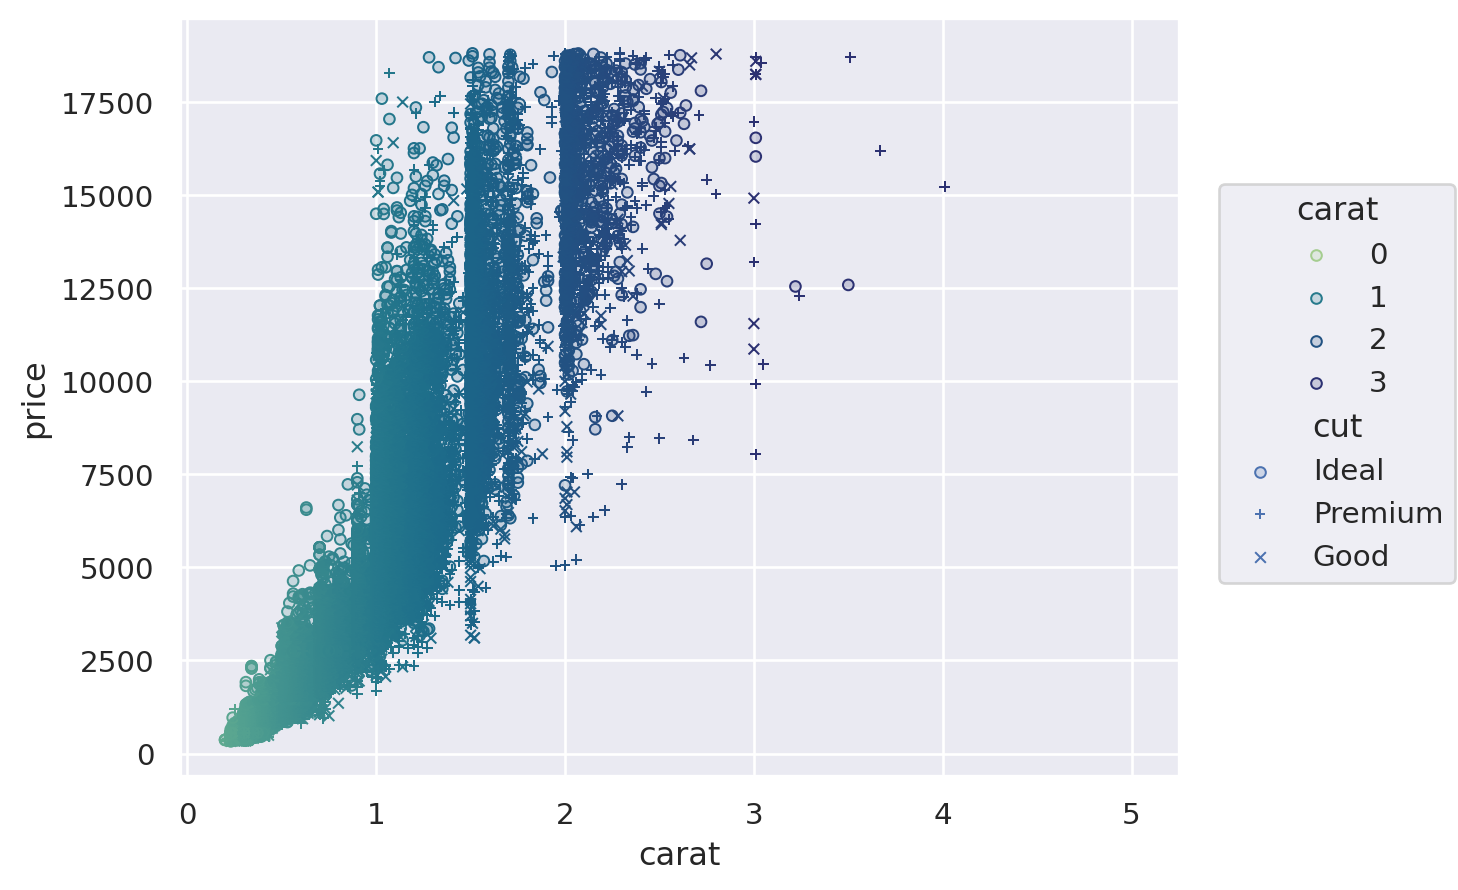

In [38]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat", marker="cut")
    .add(so.Dots())
    .scale(
        color=so.Continuous("crest", norm=(0, 3), trans="sqrt"),
        marker=so.Nominal(["o", "+", "x"], order=["Ideal", "Premium", "Good"]),
    )
)

## Customizing legends and ticks

`Scale` 개체는 표시되는 방식과 함께 범례에서 눈금 레이블로 표시되어야 하는 값을 지정하는 방법이기도 합니다. 예를 들어, `Continuous.tick()` 메서드를 사용하면 눈금의 밀도나 위치를 제어할 수 있고 `Continuous.label()` 메서드를 사용하면 형식을 수정할 수 있습니다.

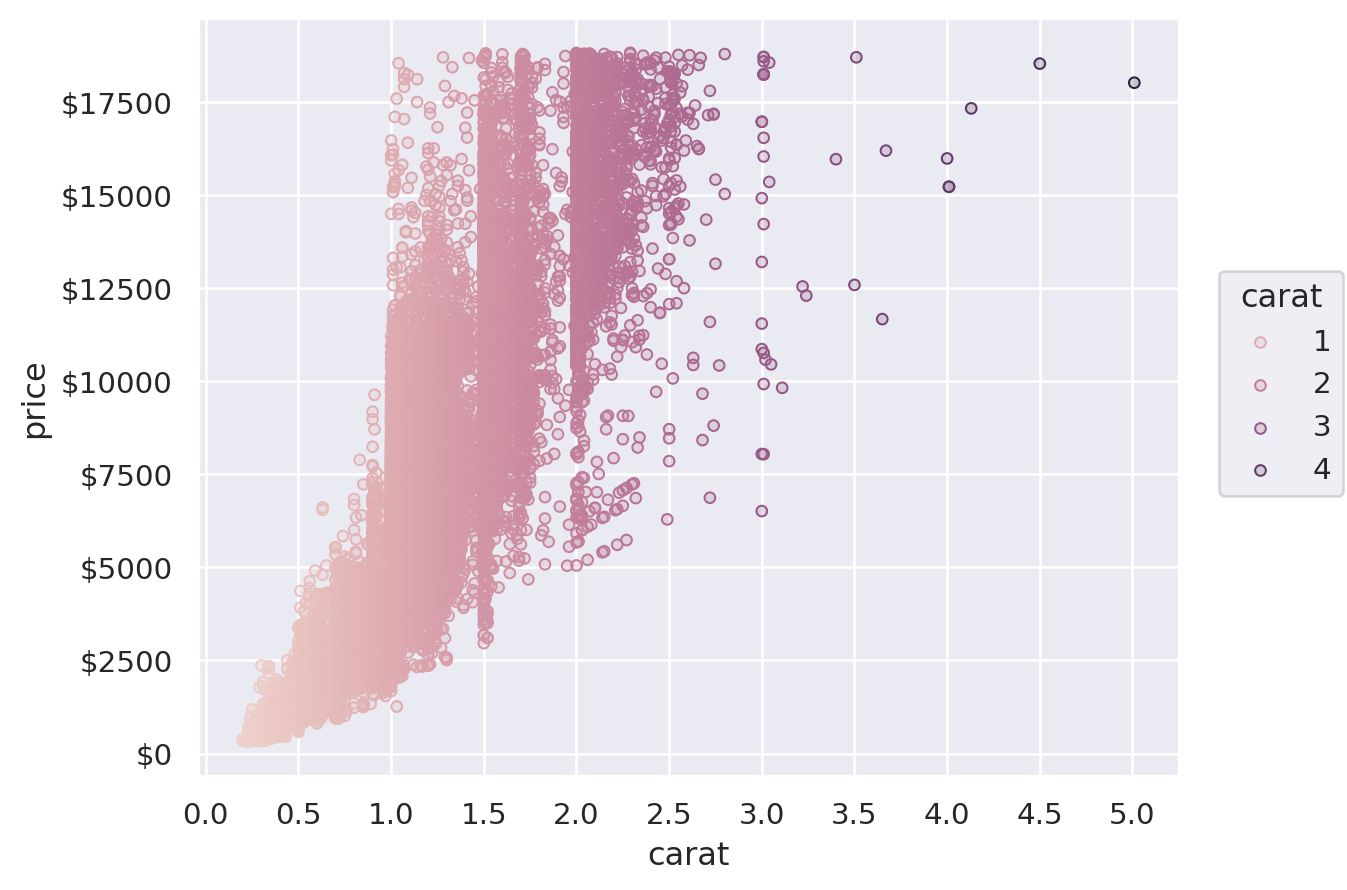

In [40]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat")
    .add(so.Dots())
    .scale(
        x=so.Continuous().tick(every=0.5),
        y=so.Continuous().label(like="${x:.0f}"),
        color=so.Continuous().tick(at=[1, 2, 3, 4]),
    )
)

## Customizing limits, labels, and titles
`Plot`에는 `Plot.label()`, `Plot.limit()` 및 `Plot.share()`를 포함하여 간단한 사용자 지정을 위한 여러 메서드가 있습니다.

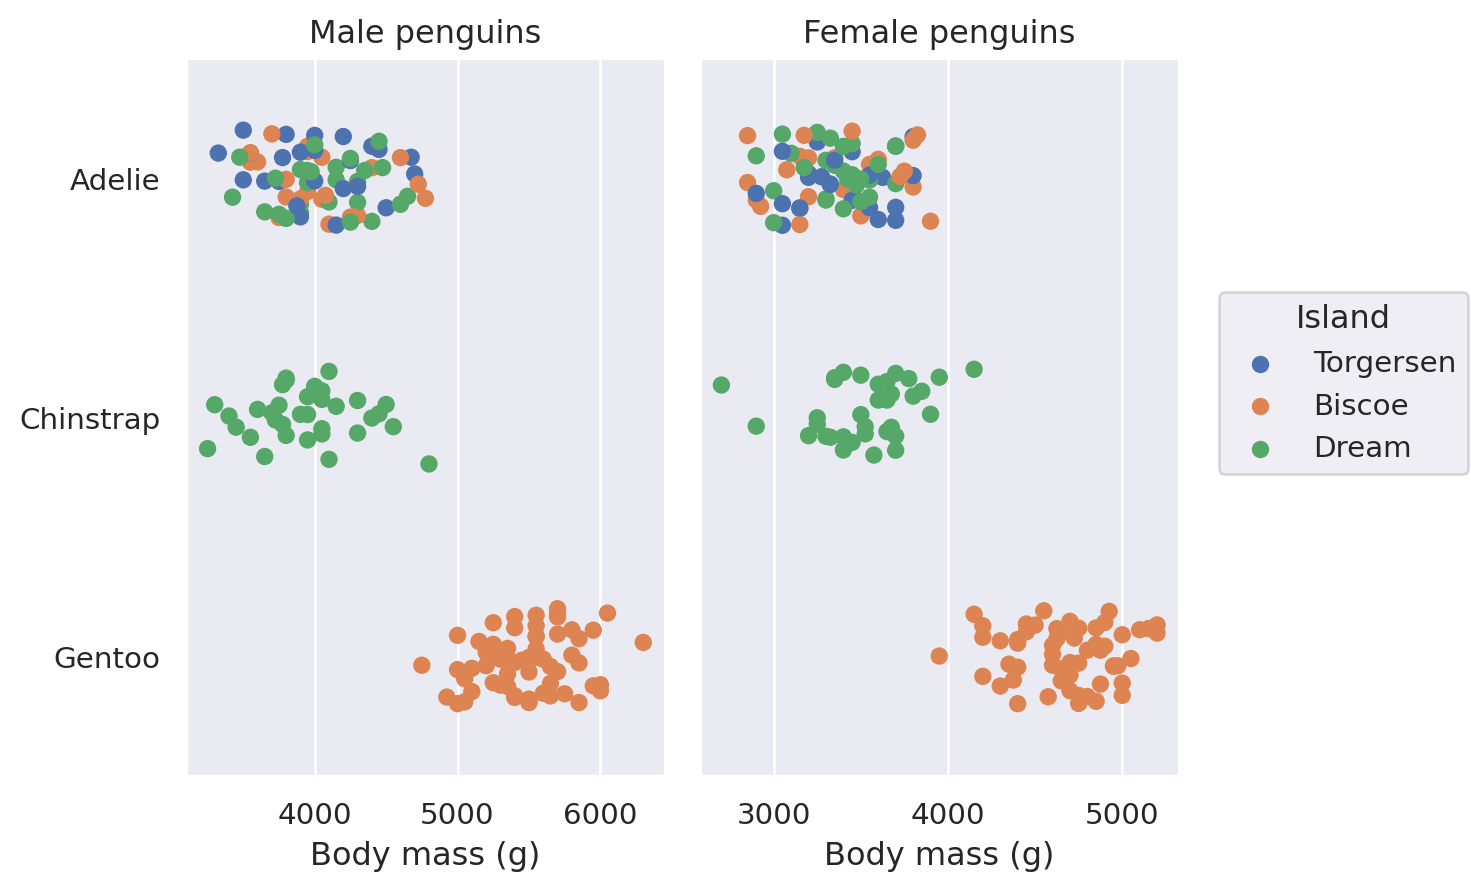

In [41]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
    )
)

## Theme customization

마지막으로 `Plot`은 `Plot.theme` 메서드를 통해 데이터 독립적인 테마 지정을 지원합니다. 현재 이 메서드는 matplotlib rc 매개변수 사전을 허용합니다. 
직접 설정하거나 seaborn의 테마 기능에서 매개변수 패키지를 전달할 수 있습니다.

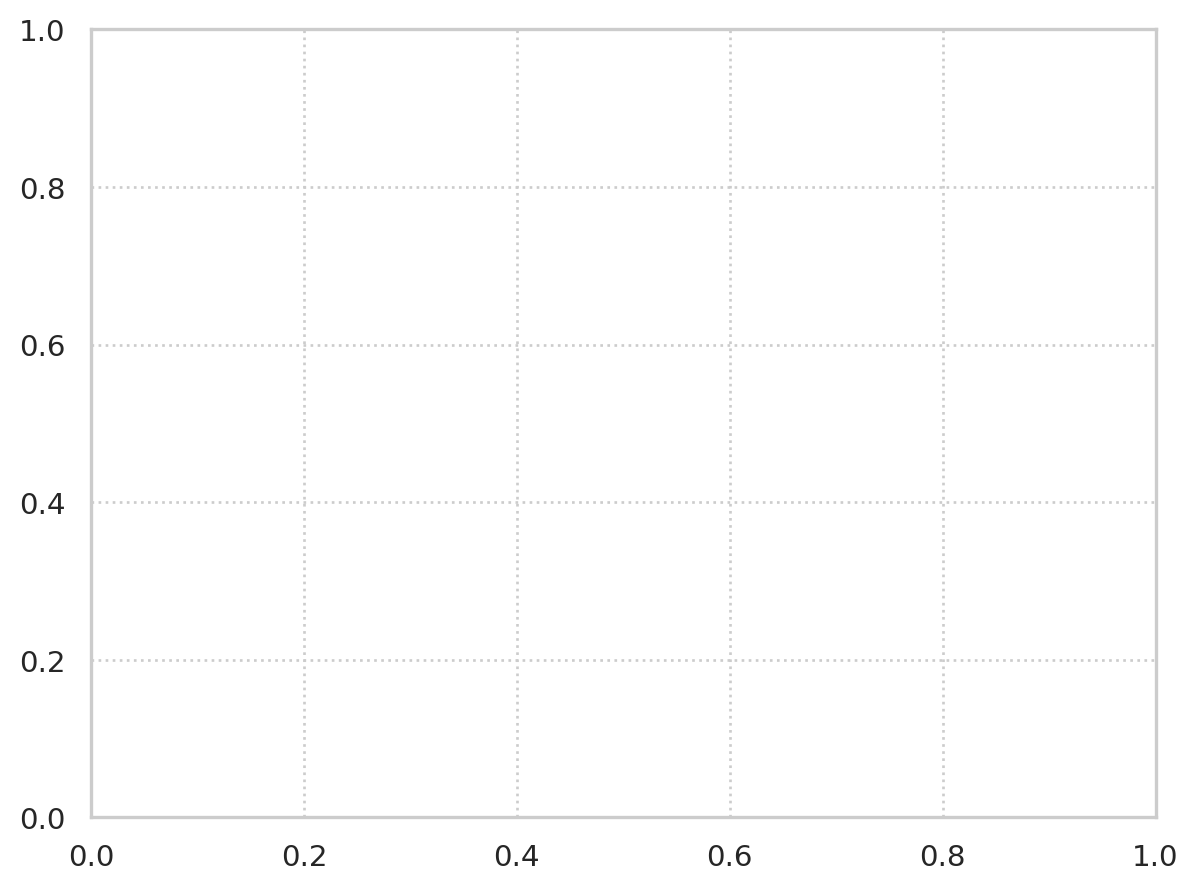

In [42]:
from seaborn import axes_style
so.Plot().theme({**axes_style("whitegrid"), "grid.linestyle": ":"})